## 1 - PRÉ PROCESSAMENTO DOS DADOS

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Carregamento das planilhas com stats e market value
df1 = pd.read_csv('marketvalues.csv')
df2 = pd.read_csv('players_data-2024_2025.csv')

In [25]:
# Merge das planilhas
df3 = pd.merge(df1, df2, on='Player')
df3["Player"].value_counts()

,count
Player,
Danilo,4
David López,4
Joshua King,2
Omar Marmoush,2
Baptiste Santamaria,2
...,...
Ibrahima Niane,1
Bamba Dieng,1
Cédric Hountondji,1


In [26]:
# Para jogadores que jogaram a temporada em dois ou mais clubes, foi necessário somar as estatisticas númericas e agrupar as variáveis categóricas
nao_somar = ["Player", "Age", "Value", "Born"]
cols_somar = [c for c in df3.columns if c not in nao_somar]
df4 = df3.groupby(["Player", "Age"], as_index=False).agg(
    {col: "sum" for col in cols_somar} | {"Value": "first", "Born": "first", "Rk": "first", "Squad": "first", "Pos": "first", "Nation": "first", "Comp": "first"}
)
df4["Player"].value_counts()

,count
Player,
Joshua King,2
David López,2
Danilo,2
Rodri,2
Melvin Zinga,1
...,...
Gianluca Busio,1
Gianluca Caprari,1
Gianluca Gaetano,1


In [27]:
# Definido o minimo de 900 minutos jogados na temporada (equivalente a 10 jogos) para que os dados sejam mais consistentes
df5 = df4[df4['Min']> 900].copy()
# Para jogadores com duas posições foi mantida a posição principal
df5['Pos'] = df5['Pos'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
df5.head()

,Player,Age,Rk,Nation,Pos,Squad,Comp,MP,Starts,Min,...,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Value,Born
3,Aaron Ramsdale,26.0,2173,eng ENG,GK,Southampton,eng Premier League,30,30,2700,...,44.6,36.0,457.0,25.0,5.5,20.0,0.67,11.7,16000000.0,1998.0
4,Aaron Wan-Bissaka,26.0,2744,eng ENG,DF,West Ham,eng Premier League,36,35,3154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24000000.0,1997.0
5,Aarón Martín,27.0,1637,es ESP,DF,Genoa,it Serie A,36,35,3085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,6500000.0,1997.0
6,Abakar Sylla,21.0,2534,ci CIV,DF,Strasbourg,fr Ligue 1,21,10,950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10000000.0,2002.0
7,Abdallah Sima,23.0,2423,sn SEN,FW,Brest,fr Ligue 1,27,14,1238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,9000000.0,2001.0


In [28]:
# Divisão em dois dfs para diferenciar jogadores de linha de goleiros
df_jogadores_linha = df5[df5['Pos'] != 'GK'].copy()
colunas_goleiro_para_remover = ['GA', 'Saves', 'CS', 'PKA', 'PKsv','GA90', 'SoTA', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt_stats_keeper', 'PKm', 'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp_stats_keeper_adv', 'Att_stats_keeper_adv','Cmp%_stats_keeper_adv' ,'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist']
df_jogadores_linha = df_jogadores_linha.drop(columns=colunas_goleiro_para_remover)

In [29]:
# 1. Identificar colunas com '_stats_'
colunas_para_remover = [col for col in df_jogadores_linha.columns if '_stats_' in col]

# 2. Remover as colunas
df_jogadores_linha = df_jogadores_linha.drop(columns=colunas_para_remover)

# 3. Exibir os resultados

print("\nColunas Removidas ({}):".format(len(colunas_para_remover)))
for col in colunas_para_remover:
    print(f"- {col}")

print("\nColunas Finais (Total: {}):".format(len(df_jogadores_linha.columns)))
print(list(df_jogadores_linha.columns))


Colunas Removidas (114):
- Rk_stats_shooting
- Nation_stats_shooting
- Pos_stats_shooting
- Comp_stats_shooting
- Age_stats_shooting
- Born_stats_shooting
- 90s_stats_shooting
- Gls_stats_shooting
- PK_stats_shooting
- PKatt_stats_shooting
- xG_stats_shooting
- npxG_stats_shooting
- Rk_stats_passing
- Nation_stats_passing
- Pos_stats_passing
- Comp_stats_passing
- Age_stats_passing
- Born_stats_passing
- 90s_stats_passing
- Ast_stats_passing
- xAG_stats_passing
- PrgP_stats_passing
- Rk_stats_passing_types
- Nation_stats_passing_types
- Pos_stats_passing_types
- Comp_stats_passing_types
- Age_stats_passing_types
- Born_stats_passing_types
- 90s_stats_passing_types
- Att_stats_passing_types
- FK_stats_passing_types
- Cmp_stats_passing_types
- Rk_stats_gca
- Nation_stats_gca
- Pos_stats_gca
- Comp_stats_gca
- Age_stats_gca
- Born_stats_gca
- 90s_stats_gca
- Sh_stats_gca
- Rk_stats_defense
- Nation_stats_defense
- Pos_stats_defense
- Comp_stats_defense
- Age_stats_defense
- Born_stats_de

In [30]:
df_jogadores_linha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 4 to 2275
Columns: 123 entries, Player to Born
dtypes: float64(38), int64(80), object(5)
memory usage: 1.2+ MB


In [31]:
colunas_categoricas = ['Squad', 'Comp', 'Pos', 'Nation', 'Player']
colunas_numericas = [col for col in df_jogadores_linha.columns if col not in colunas_categoricas and df_jogadores_linha[col].dtype != 'object']

for col in colunas_numericas:
    # Converter colunas numéricas (int64 e float64) para o tipo float64
    try:
        df_jogadores_linha[col] = df_jogadores_linha[col].astype(np.float64)
    except Exception as e:
        print(f"Aviso: Não foi possível converter a coluna {col} para float64. Erro: {e}")
print(df_jogadores_linha.dtypes.value_counts())

float64    118
object       5
Name: count, dtype: int64


In [32]:
df_jogadores_linha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 4 to 2275
Columns: 123 entries, Player to Born
dtypes: float64(118), object(5)
memory usage: 1.2+ MB


In [33]:
# --- FUNÇÃO DE CORREÇÃO DE VIÉS ---
def agrupar_baixa_frequencia(df_input, coluna, limite=5):
    """Agrupa categorias com menos ocorrências que o limite em 'Outras'."""
    # Contar a frequência de cada categoria na coluna
    contagens = df_input[coluna].value_counts()

    # Identificar categorias raras
    categorias_raras = contagens[contagens < limite].index

    # Substituir categorias raras por 'Outras'
    df_input[coluna] = df_input[coluna].apply(lambda x: 'Outras' if x in categorias_raras else x)
    return df_input

# --- APLICAÇÃO DA CORREÇÃO ---
df_jogadores_linha = df_jogadores_linha.copy()
colunas_categoricas_para_corrigir = ['Nation', 'Squad', 'Comp']

print("Corrigindo categorias de baixa frequência...")
for col in colunas_categoricas_para_corrigir:
    df_jogadores_linha = agrupar_baixa_frequencia(df_jogadores_linha, col, limite=5)


Corrigindo categorias de baixa frequência...


## 2 - Análise Exploratória dos Dados


In [34]:
# Mudança da variável Value para log_Value para normalização
df_jogadores_linha['log_Value'] = np.log1p(df_jogadores_linha['Value'])

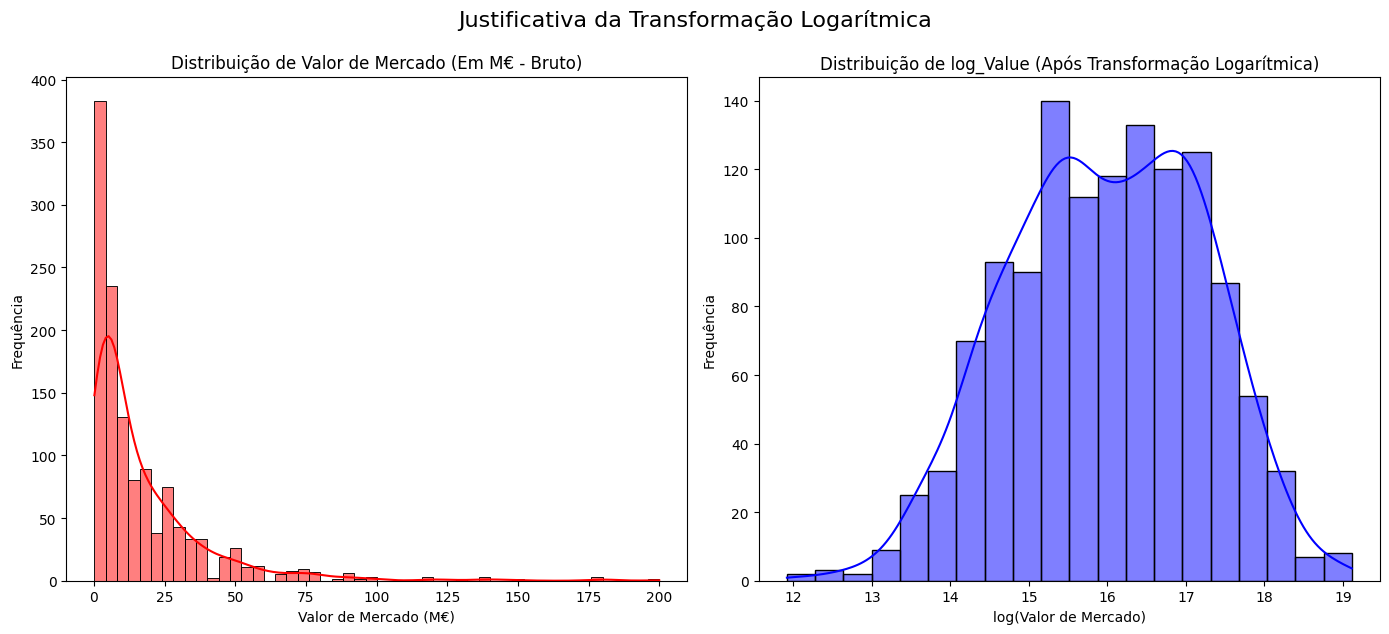

In [35]:
# Histogramas da distriubuição de valor de mercado antes e depois da transformação logarítmica
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_jogadores_linha['Value'] / 1_000_000, bins=50, kde=True, color='red')
plt.title('Distribuição de Valor de Mercado (Em M€ - Bruto)')
plt.xlabel('Valor de Mercado (M€)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df_jogadores_linha['log_Value'], bins=20, kde=True, color='blue')
plt.title('Distribuição de log_Value (Após Transformação Logarítmica)')
plt.xlabel('log(Valor de Mercado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.suptitle("Justificativa da Transformação Logarítmica", fontsize=16, y=1.05)
plt.show()

In [36]:
# Remoção da variavel Value
df_jogadores_linha = df_jogadores_linha.drop(columns=['Value', 'Min', 'Att', 'npxG', 'npxG+xAG', 'Min%'])

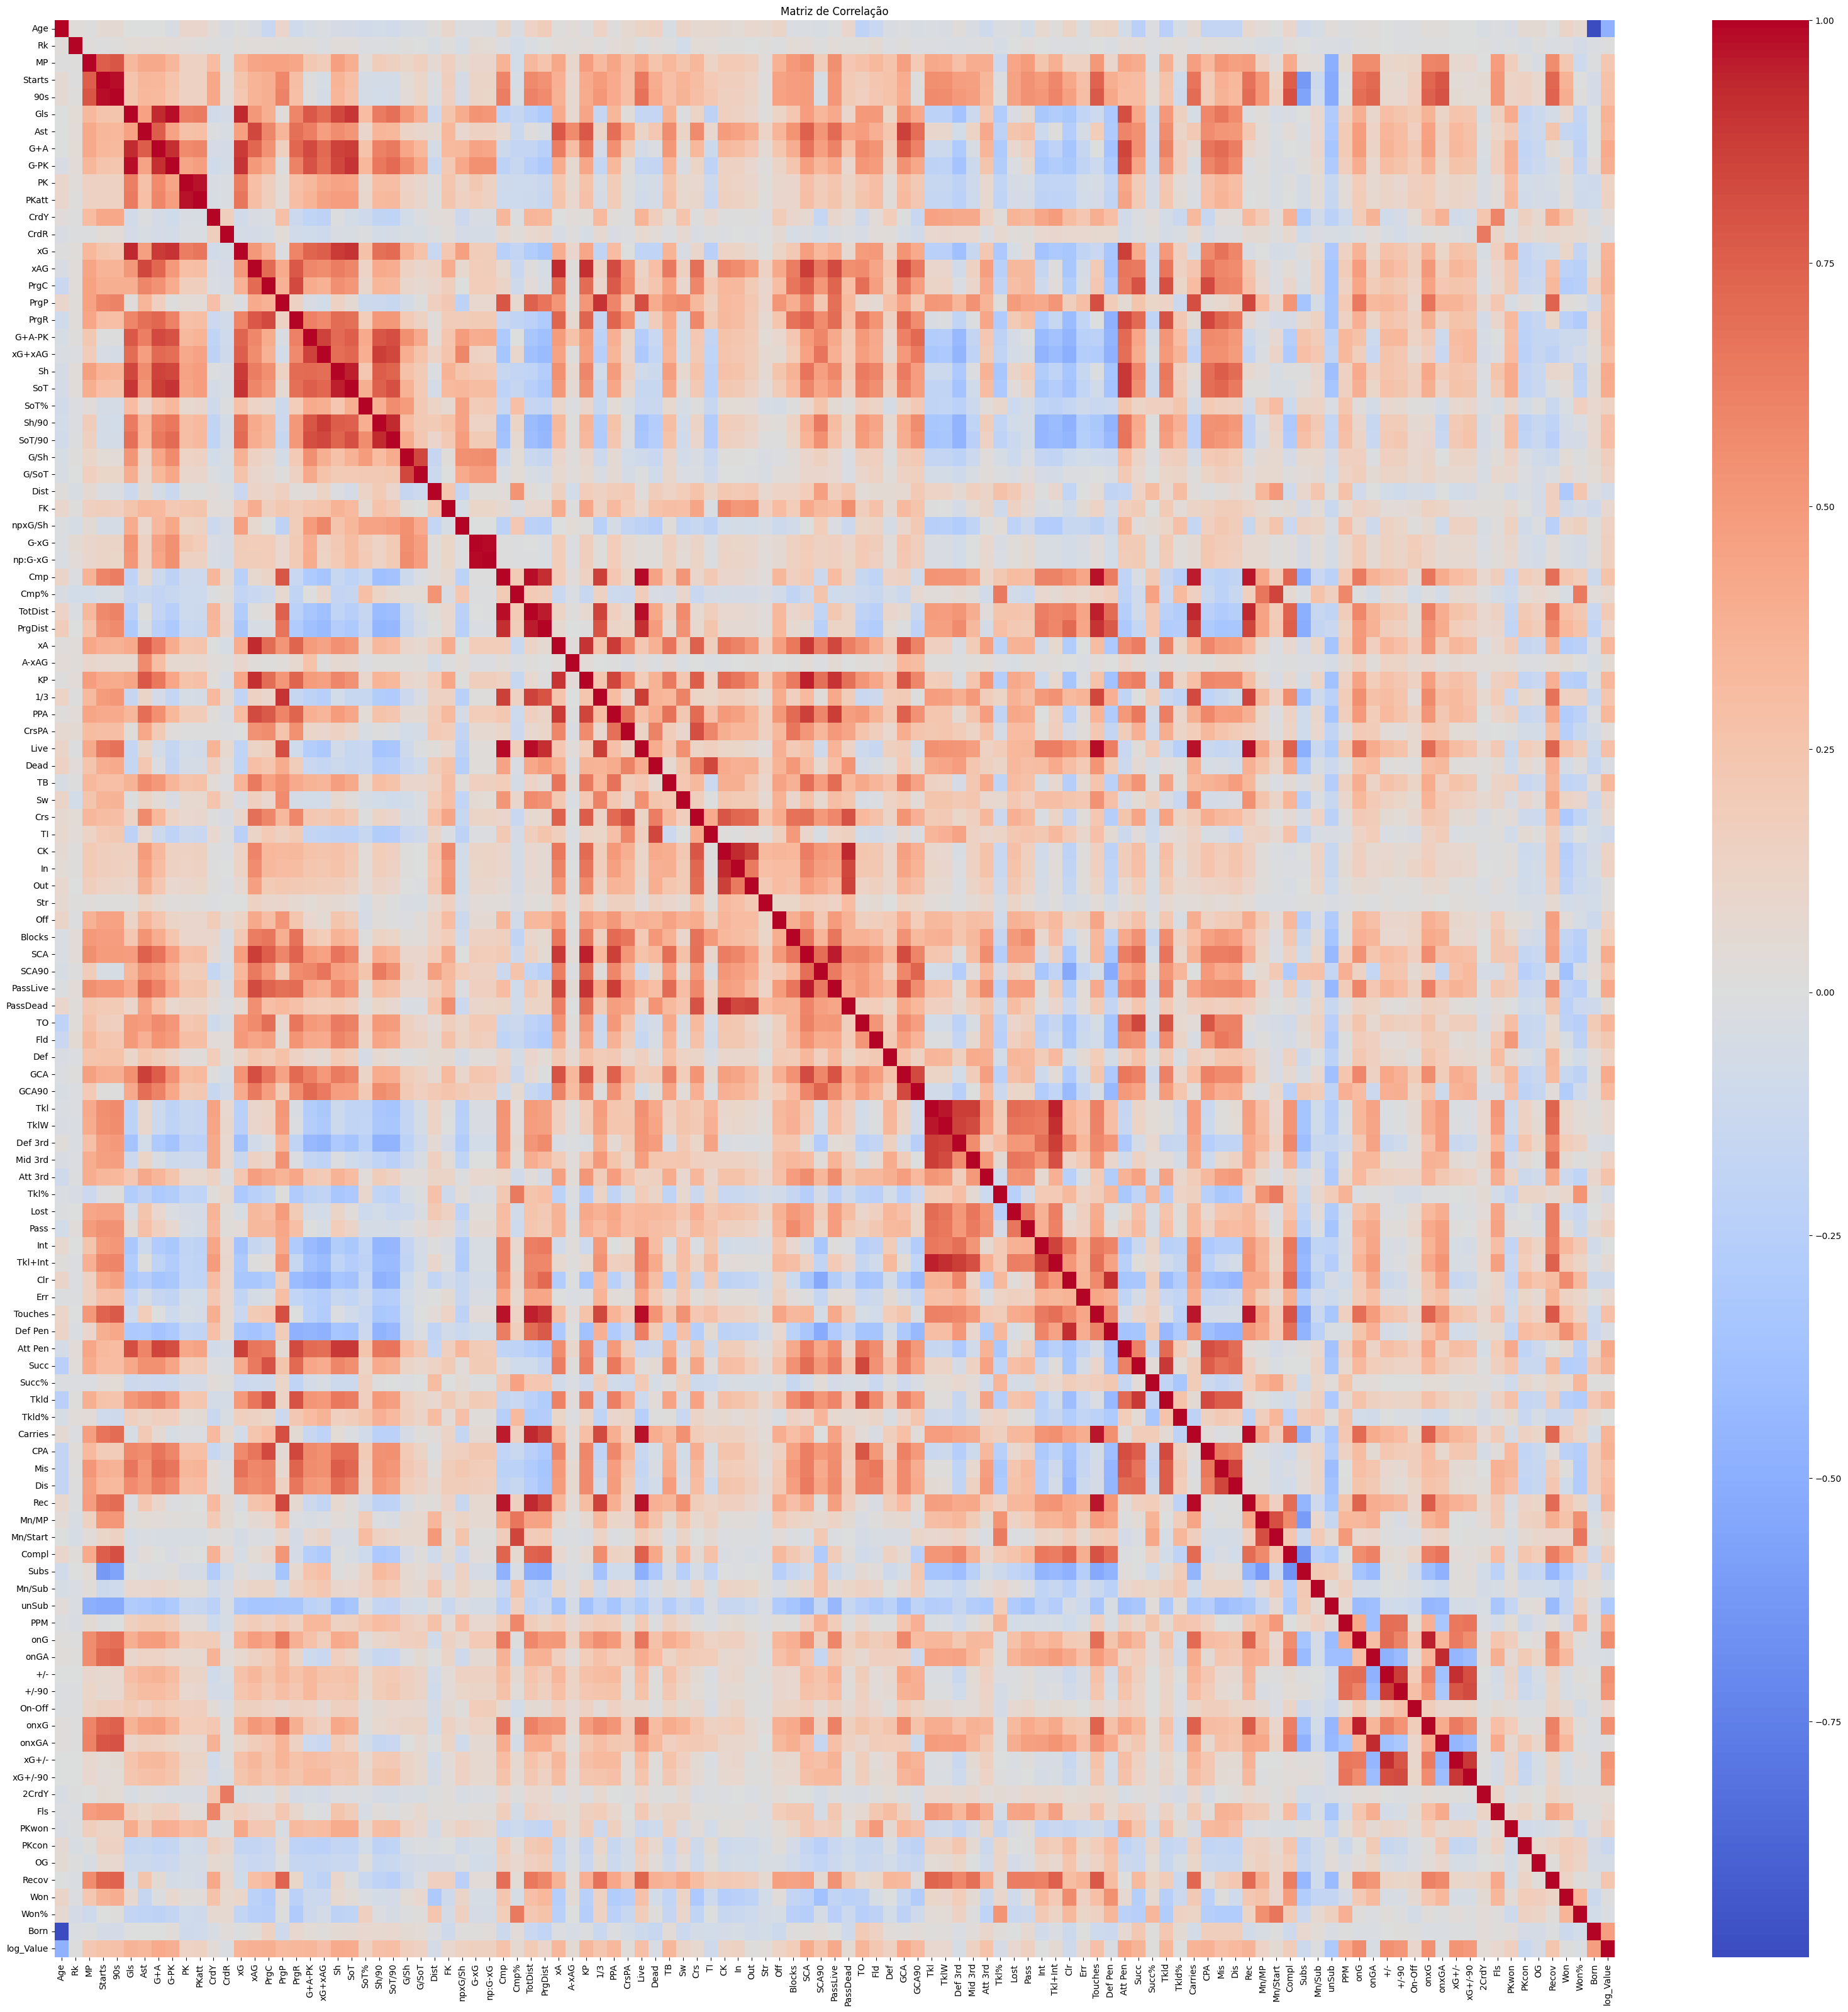

In [37]:
# Matriz de correlação entre a variável log_Value e o restante das variáveis
corr = df_jogadores_linha.corr(numeric_only=True)

# Plot
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## 3 - Tratamento de Multicolinearidade

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
y = df_jogadores_linha['log_Value']

# Definição das colunas
COLUNAS_CATEGORICAS = ['Squad', 'Comp', 'Pos', 'Nation']
COLUNAS_PARA_EXCLUIR_INICIAL = ['log_Value','Rk', 'Player', 'Born'] + COLUNAS_CATEGORICAS

In [40]:
# Preparação do X inicial (apenas numéricos) para rodar o RFE
X_num_rfe = df_jogadores_linha.drop(columns=COLUNAS_PARA_EXCLUIR_INICIAL, errors='ignore').select_dtypes(include=np.number)
X_num_rfe = X_num_rfe.fillna(X_num_rfe.mean())

# Escalonamento para o RFE
scaler_rfe = StandardScaler()
X_scaled_rfe = pd.DataFrame(scaler_rfe.fit_transform(X_num_rfe), columns=X_num_rfe.columns)

# RFE: Selecionar 35 features
model_rfe = Ridge(alpha=1.0)
rfe = RFE(model_rfe, n_features_to_select=35, step=1)
rfe.fit(X_scaled_rfe, y)

COLUNAS_RFE_NUMERICAS = X_scaled_rfe.columns[rfe.support_].tolist()

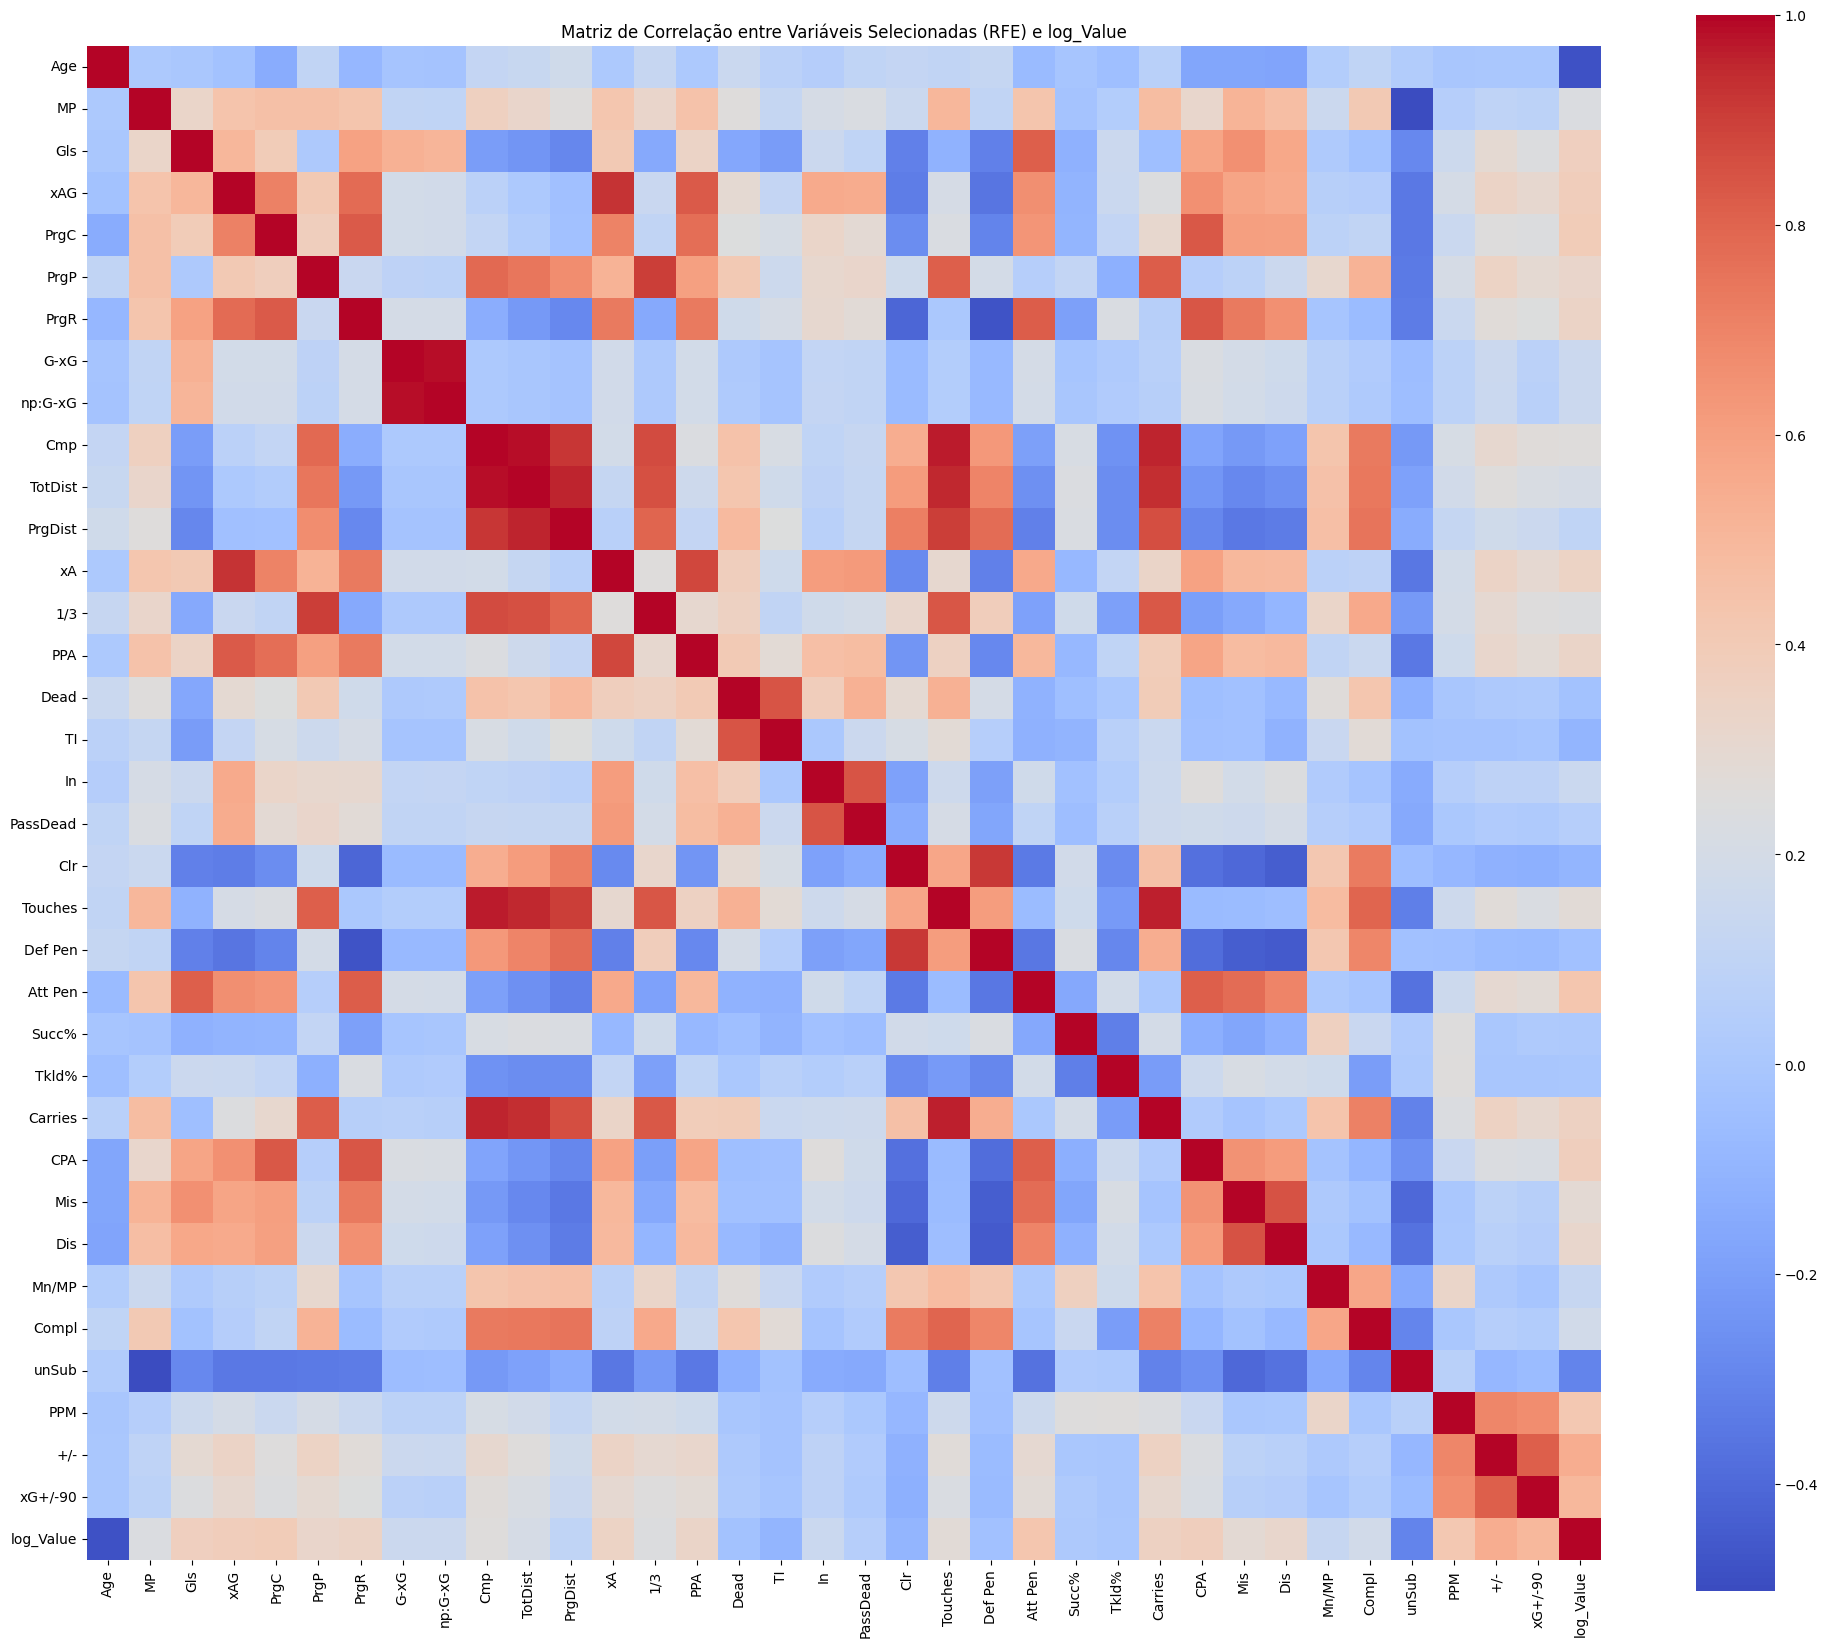

In [41]:
cols_corr = COLUNAS_RFE_NUMERICAS + ['log_Value']
df_corr = df_jogadores_linha[cols_corr].copy()

# --- 2. Calcular matriz de correlação ---
corr_matrix = df_corr.corr()

# --- 3. Plotar heatmap ---
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,annot=False,fmt=".2f",cmap='coolwarm',square=True,cbar_kws={"shrink": 0.8})
plt.title("Matriz de Correlação entre Variáveis Selecionadas (RFE) e log_Value", fontsize=12)
plt.tight_layout()
plt.show()

# **Fase 1 - Utilização de variáveis de Desempenho e variáveis de contexto (Time, Liga, Posição, Idade, Nacionalidade)**

## 4 - Divisão e Treinamento dos Dados

In [42]:
# 1. Definir os passos de transformação
transformador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

transformador_categorico = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 2. Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, COLUNAS_RFE_NUMERICAS),
        ('cat', transformador_categorico, COLUNAS_CATEGORICAS)
    ],
    remainder='drop'
)

# 3. Preparar o X final com todas as colunas necessárias
COLUNAS_FINAIS_ML = COLUNAS_RFE_NUMERICAS + COLUNAS_CATEGORICAS
X = df_jogadores_linha[COLUNAS_FINAIS_ML].copy()

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5 - Otimização de Hiperparâmetros para o RF e XGBoost

In [43]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [10, 20, None],
    'model__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)

print(f"Melhores parâmetros RF: {grid_rf.best_params_}")
print(f"Melhor RMSE (treino): {-grid_rf.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros RF: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__n_estimators': 500}
Melhor RMSE (treino): 0.7278


In [44]:
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid_xgb = {
    'model__n_estimators': [200, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)

print(f"Melhores parâmetros XGB: {grid_xgb.best_params_}")
print(f"Melhor RMSE (treino): {-grid_xgb.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros XGB: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 500}
Melhor RMSE (treino): 0.5370


## 6 - Avaliação dos Modelos

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- 1. Função auxiliar ---
def avaliar_modelo(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# --- 2. Treinar e prever cada modelo com o preprocessor ---

# Regressão Linear
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

# Random Forest
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        max_features='sqrt',
        random_state=42
    ))
])
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

# XGBoost
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    ))
])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

# --- 3. Avaliar métricas de desempenho ---
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest', 'XGBoost'],
    'RMSE': [
        avaliar_modelo(y_test, y_pred_lr)[0],
        avaliar_modelo(y_test, y_pred_rf)[0],
        avaliar_modelo(y_test, y_pred_xgb)[0]
    ],
    'MAE': [
        avaliar_modelo(y_test, y_pred_lr)[1],
        avaliar_modelo(y_test, y_pred_rf)[1],
        avaliar_modelo(y_test, y_pred_xgb)[1]
    ],
    'R²': [
        avaliar_modelo(y_test, y_pred_lr)[2],
        avaliar_modelo(y_test, y_pred_rf)[2],
        avaliar_modelo(y_test, y_pred_xgb)[2]
    ]
})

# --- 4. Exibir resultados ---
print("Métricas de desempenho nos dados de teste:\n")
print(resultados.round(4))


Métricas de desempenho nos dados de teste:

             Modelo    RMSE     MAE      R²
0  Regressão Linear  0.4774  0.3657  0.8634
1     Random Forest  0.6997  0.5664  0.7067
2           XGBoost  0.5047  0.3884  0.8474


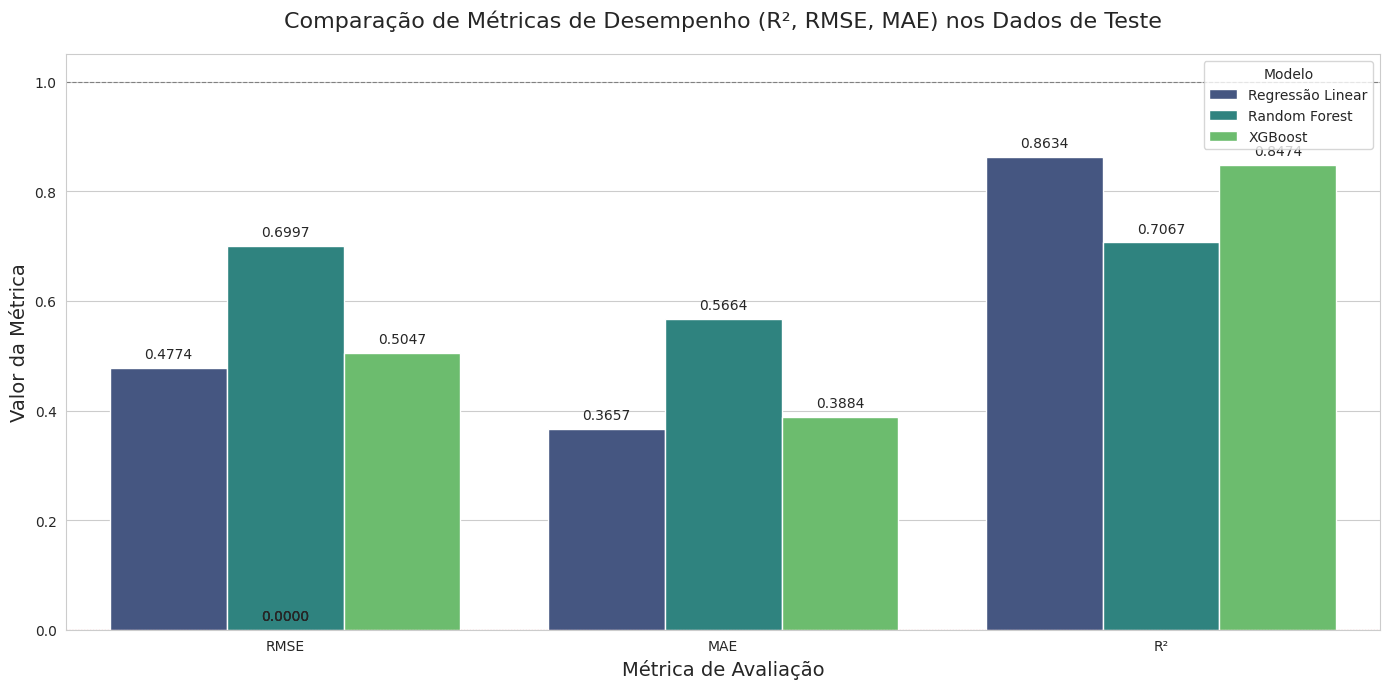

In [46]:
df_metrics = resultados.copy()
df_long = df_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# 3. Criação da Visualização
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_long,
    x='Métrica',
    y='Valor',
    hue='Modelo',
    palette='viridis'
)

# Personalização e Títulos
plt.title('Comparação de Métricas de Desempenho (R², RMSE, MAE) nos Dados de Teste', fontsize=16, pad=20)
plt.xlabel('Métrica de Avaliação', fontsize=14)
plt.ylabel('Valor da Métrica', fontsize=14)
plt.legend(title='Modelo', loc='upper right')

# Adicionar o valor da métrica em cima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# Linhas de referência para interpretação
ax.axhline(1.0, color='gray', linestyle='--', linewidth=0.8) # R² Ideal
ax.axhline(0.0, color='red', linestyle=':', linewidth=0.8) # RMSE/MAE Ideal

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## 7 - Visualizações Gráficas

/tmp/ipython-input-1655657585.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_positivo_lr, y='feature', x='coeficiente', palette='viridis')


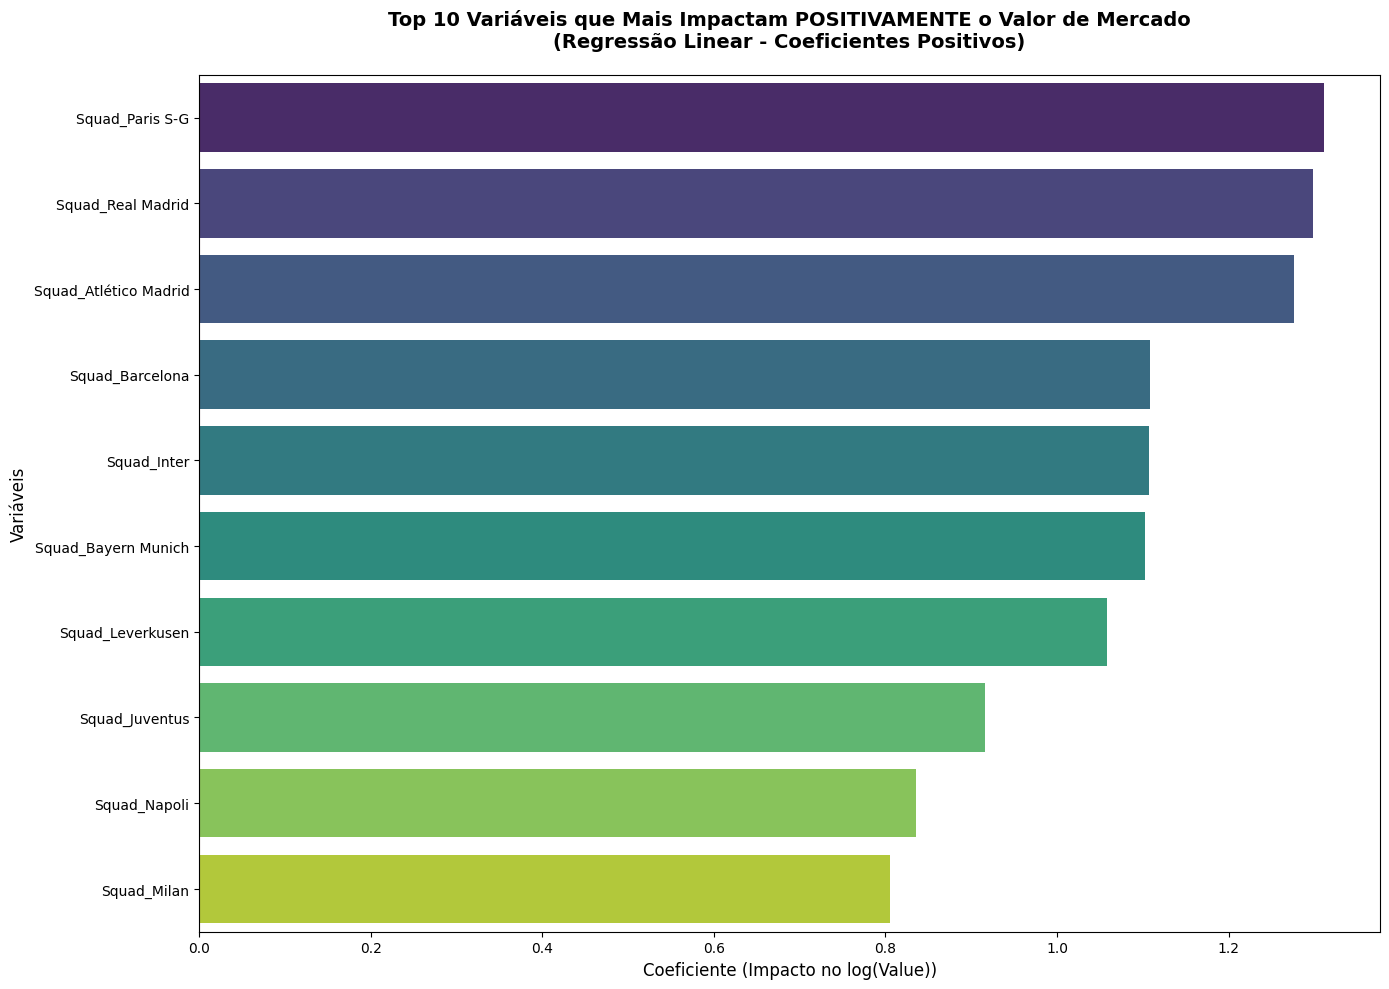

In [47]:
from sklearn.inspection import permutation_importance

# Configurações de estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. EXTRAIR COEFICIENTES DA REGRESSÃO LINEAR
lr_model = pipe_lr.named_steps['model']
preprocessor = pipe_lr.named_steps['preprocessor']

# Obter os nomes das features após pré-processamento
feature_names = []

# Adicionar nomes das features numéricas
feature_names.extend(COLUNAS_RFE_NUMERICAS)

# Adicionar nomes das features categóricas (após one-hot encoding)
if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(COLUNAS_CATEGORICAS)
    feature_names.extend(cat_features)
else:
    # Fallback: criar nomes manualmente
    for col in COLUNAS_CATEGORICAS:
        unique_vals = X_train[col].unique()
        for val in unique_vals:
            feature_names.append(f"{col}_{val}")

# Obter coeficientes da regressão linear
coeficientes = lr_model.coef_

# Garantir que temos o mesmo número de features
if len(coeficientes) > len(feature_names):
    coeficientes = coeficientes[:len(feature_names)]
elif len(coeficientes) < len(feature_names):
    feature_names = feature_names[:len(coeficientes)]

# Criar DataFrame com coeficientes
df_coeficientes = pd.DataFrame({
    'feature': feature_names,
    'coeficiente': coeficientes,
    'abs_coeficiente': np.abs(coeficientes)  # Para ordenar por magnitude
})

# 2. GRÁFICO DAS VARIÁVEIS QUE MAIS IMPACTAM POSITIVAMENTE (coeficientes positivos)
coef_positivos = df_coeficientes[df_coeficientes['coeficiente'] > 0].sort_values('coeficiente', ascending=False)
top_10_positivo_lr = coef_positivos.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_positivo_lr, y='feature', x='coeficiente', palette='viridis')
plt.title('Top 10 Variáveis que Mais Impactam POSITIVAMENTE o Valor de Mercado\n(Regressão Linear - Coeficientes Positivos)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()




/tmp/ipython-input-465104960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_negativo_lr, y='feature', x='coeficiente', palette='Reds_r')


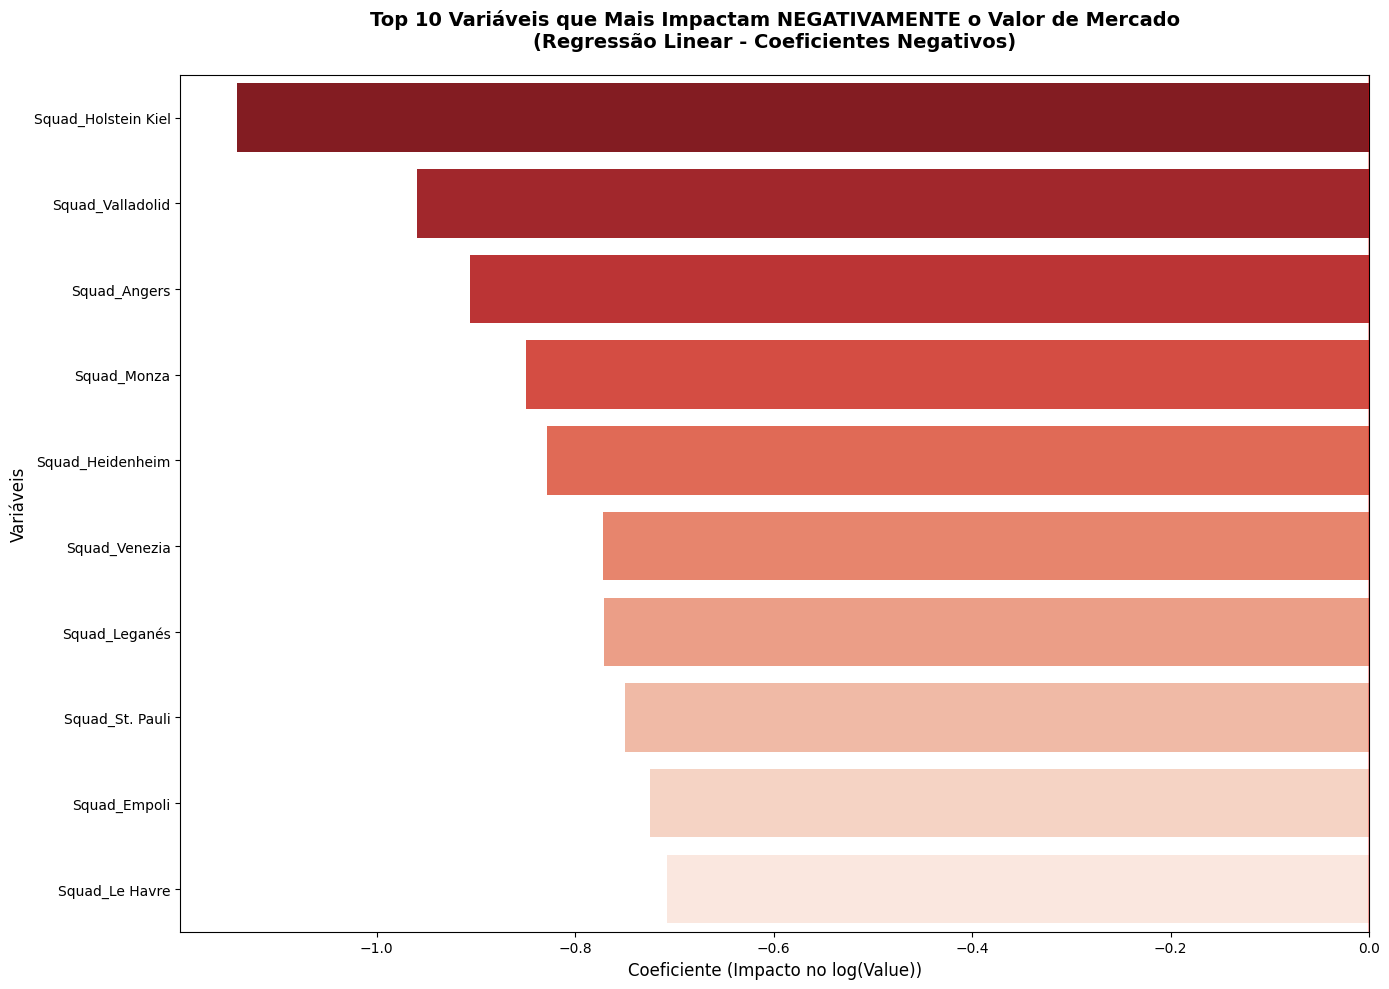

In [48]:
# 3. GRÁFICO DAS VARIÁVEIS QUE MAIS IMPACTAM NEGATIVAMENTE (coeficientes negativos)
coef_negativos = df_coeficientes[df_coeficientes['coeficiente'] < 0].sort_values('coeficiente', ascending=True)
top_10_negativo_lr = coef_negativos.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_negativo_lr, y='feature', x='coeficiente', palette='Reds_r')
plt.title('Top 10 Variáveis que Mais Impactam NEGATIVAMENTE o Valor de Mercado\n(Regressão Linear - Coeficientes Negativos)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

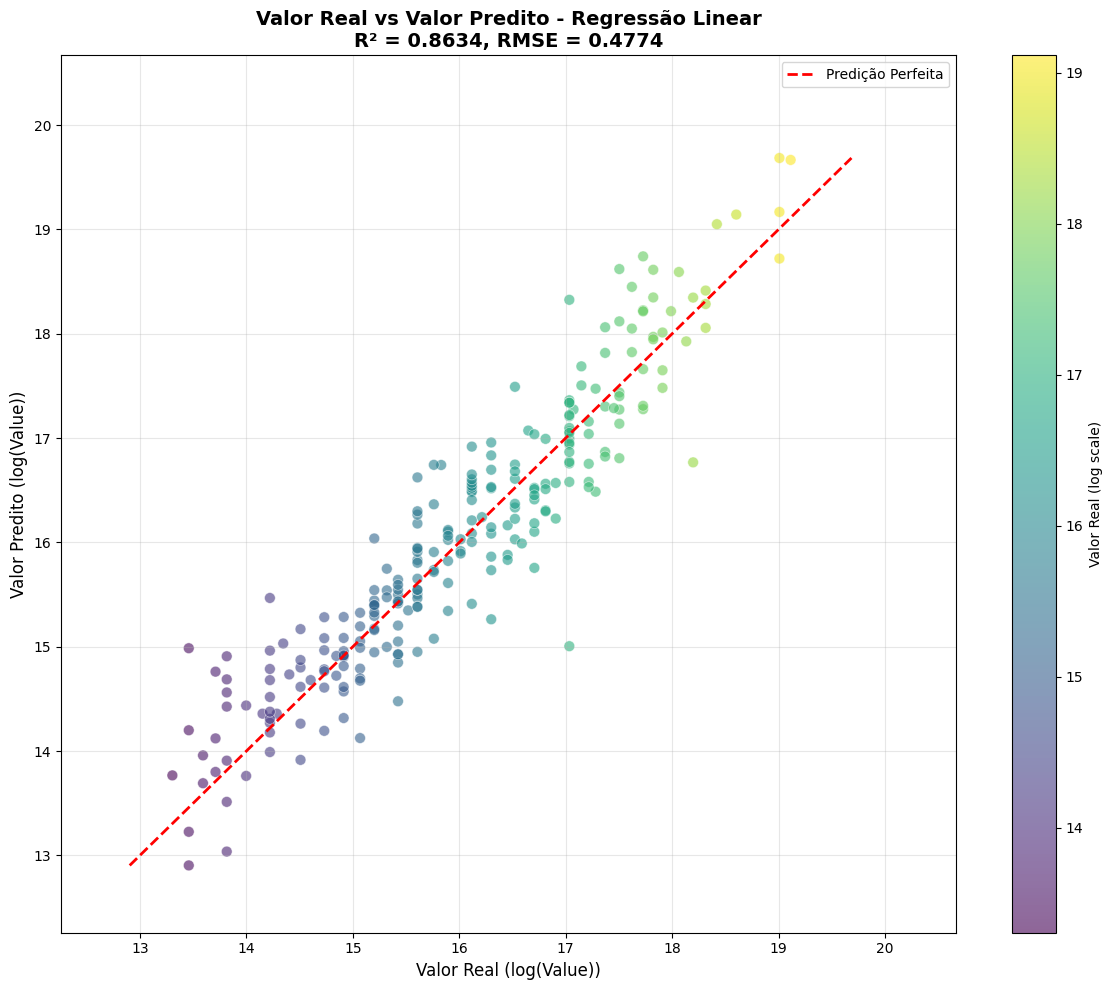

In [49]:
# 4. GRÁFICO DE DISPERSÃO: VALOR REAL vs VALOR PREDITO (EM ESCALA LOG - Regressão Linear)
# Manter em escala logarítmica como solicitado
y_test_log = y_test
y_pred_lr_log = y_pred_lr

# Calcular métricas para o gráfico
r2_lr = resultados[resultados['Modelo'] == 'Regressão Linear']['R²'].values[0]
rmse_lr = resultados[resultados['Modelo'] == 'Regressão Linear']['RMSE'].values[0]

# Criar scatter plot em escala log
plt.figure(figsize=(12, 10))

# Plot principal
scatter = plt.scatter(y_test_log, y_pred_lr_log,
                     alpha=0.6, s=60, c=y_test_log, cmap='viridis',
                     edgecolors='white', linewidth=0.5)

# Linha de perfeita predição
min_val = min(y_test_log.min(), y_pred_lr_log.min())
max_val = max(y_test_log.max(), y_pred_lr_log.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')

plt.colorbar(scatter, label='Valor Real (log scale)')
plt.xlabel('Valor Real (log(Value))', fontsize=12)
plt.ylabel('Valor Predito (log(Value))', fontsize=12)
plt.title(f'Valor Real vs Valor Predito - Regressão Linear\nR² = {r2_lr:.4f}, RMSE = {rmse_lr:.4f}',
          fontsize=14, fontweight='bold')

# Adicionar grid
plt.grid(True, alpha=0.3)
plt.legend()

# Ajustar limites dos eixos
plt.xlim(min_val * 0.95, max_val * 1.05)
plt.ylim(min_val * 0.95, max_val * 1.05)

plt.tight_layout()
plt.show()

# **Fase 2 - Variáveis de Desempenho + Idade**

In [50]:
# 1. DEFINIR NOVAS COLUNAS (removendo Squad, Comp, Nation)
COLUNAS_CATEGORICAS_FASE2 = ['Pos']  # Apenas posição mantida
COLUNAS_RFE_NUMERICAS_FASE2 = COLUNAS_RFE_NUMERICAS  # Mantemos as mesmas numéricas

print(f"Variáveis categóricas Fase 2: {COLUNAS_CATEGORICAS_FASE2}")
print(f"Variáveis numéricas Fase 2: {len(COLUNAS_RFE_NUMERICAS_FASE2)} colunas")

# 2. PREPARAR OS DADOS PARA FASE 2
COLUNAS_FINAIS_ML_FASE2 = COLUNAS_RFE_NUMERICAS_FASE2 + COLUNAS_CATEGORICAS_FASE2
X_fase2 = df_jogadores_linha[COLUNAS_FINAIS_ML_FASE2].copy()
y_fase2 = df_jogadores_linha['log_Value']

print(f"Shape X_fase2: {X_fase2.shape}")
print(f"Colunas removidas: Squad, Comp, Nation")

# 3. DIVISÃO DOS DADOS (mesma semente para comparabilidade)
X_train_f2, X_test_f2, y_train_f2, y_test_f2 = train_test_split(
    X_fase2, y_fase2, test_size=0.2, random_state=42, stratify=df_jogadores_linha['Pos']
)

print(f"\nDivisão dos dados:")
print(f"Treino: {X_train_f2.shape[0]} amostras")
print(f"Teste: {X_test_f2.shape[0]} amostras")


Variáveis categóricas Fase 2: ['Pos']
Variáveis numéricas Fase 2: 35 colunas
Shape X_fase2: (1262, 36)
Colunas removidas: Squad, Comp, Nation

Divisão dos dados:
Treino: 1009 amostras
Teste: 253 amostras


In [51]:
# 4. PIPELINE DE PRÉ-PROCESSAMENTO FASE 2
transformador_numerico_f2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

transformador_categorico_f2 = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_f2 = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico_f2, COLUNAS_RFE_NUMERICAS_FASE2),
        ('cat', transformador_categorico_f2, COLUNAS_CATEGORICAS_FASE2)
    ],
    remainder='drop'
)

In [52]:
# 5. TREINAR MODELOS - FASE 2

# 5.1 Regressão Linear - Fase 2

pipe_lr_f2 = Pipeline(steps=[
    ('preprocessor', preprocessor_f2),
    ('model', LinearRegression())
])

pipe_lr_f2.fit(X_train_f2, y_train_f2)
y_pred_lr_f2 = pipe_lr_f2.predict(X_test_f2)

# 5.2 Random Forest - Fase 2


pipe_rf_f2 = Pipeline(steps=[
    ('preprocessor', preprocessor_f2),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])

pipe_rf_f2.fit(X_train_f2, y_train_f2)
y_pred_rf_f2 = pipe_rf_f2.predict(X_test_f2)


pipe_xgb_f2 = Pipeline(steps=[
    ('preprocessor', preprocessor_f2),
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    ))
])

pipe_xgb_f2.fit(X_train_f2, y_train_f2)
y_pred_xgb_f2 = pipe_xgb_f2.predict(X_test_f2)


TREINANDO REGRESSÃO LINEAR - FASE 2

TREINANDO RANDOM FOREST - FASE 2

TREINANDO XGBOOST - FASE 2


In [53]:
# 6. AVALIAÇÃO DOS MODELOS - FASE 2
print("\n" + "="*70)
print("AVALIAÇÃO DOS MODELOS - FASE 2")
print("="*70)

resultados_fase2 = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest', 'XGBoost'],
    'RMSE': [
        avaliar_modelo(y_test_f2, y_pred_lr_f2)[0],
        avaliar_modelo(y_test_f2, y_pred_rf_f2)[0],
        avaliar_modelo(y_test_f2, y_pred_xgb_f2)[0]
    ],
    'MAE': [
        avaliar_modelo(y_test_f2, y_pred_lr_f2)[1],
        avaliar_modelo(y_test_f2, y_pred_rf_f2)[1],
        avaliar_modelo(y_test_f2, y_pred_xgb_f2)[1]
    ],
    'R²': [
        avaliar_modelo(y_test_f2, y_pred_lr_f2)[2],
        avaliar_modelo(y_test_f2, y_pred_rf_f2)[2],
        avaliar_modelo(y_test_f2, y_pred_xgb_f2)[2]
    ]
})

print("Métricas de desempenho - FASE 2:\n")
print(resultados_fase2.round(4))



AVALIAÇÃO DOS MODELOS - FASE 2
Métricas de desempenho - FASE 2:

             Modelo    RMSE     MAE      R²
0  Regressão Linear  0.6540  0.5247  0.7173
1     Random Forest  0.7069  0.5786  0.6697
2           XGBoost  0.7076  0.5659  0.6691


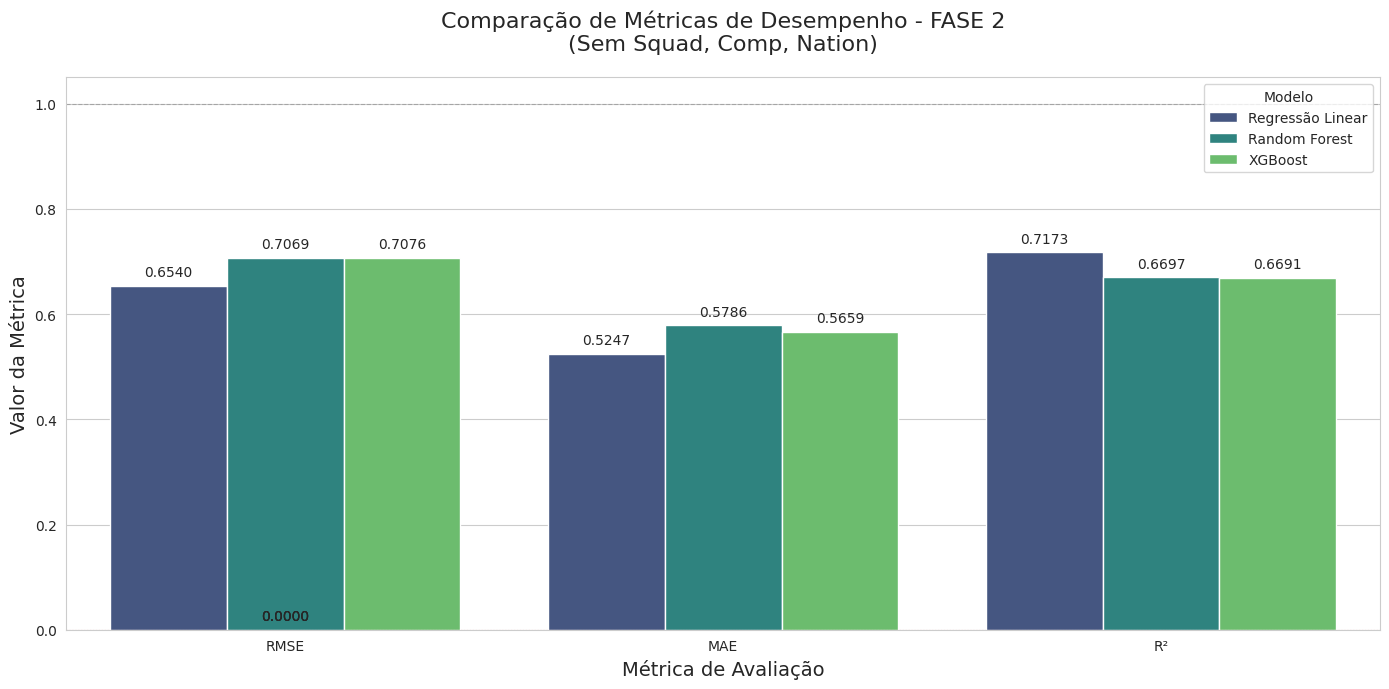

In [54]:
# 1. Criar DataFrame limpo apenas com as métricas da Fase 2
df_metrics_fase2 = resultados_fase2[['Modelo', 'RMSE', 'MAE', 'R²']].copy()

# 2. Preparar os dados no formato longo
df_long_fase2 = df_metrics_fase2.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# 3. Criação da Visualização
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_long_fase2,
    x='Métrica',
    y='Valor',
    hue='Modelo',
    palette='viridis'
)

# Personalização e Títulos
plt.title('Comparação de Métricas de Desempenho - FASE 2\n(Sem Squad, Comp, Nation)', fontsize=16, pad=20)
plt.xlabel('Métrica de Avaliação', fontsize=14)
plt.ylabel('Valor da Métrica', fontsize=14)
plt.legend(title='Modelo', loc='upper right')

# Adicionar o valor da métrica em cima de cada barra
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# Linhas de referência para interpretação
ax.axhline(1.0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5) # R² Ideal
ax.axhline(0.0, color='red', linestyle=':', linewidth=0.8, alpha=0.5) # RMSE/MAE Ideal

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1663067133.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_positivo_lr_f2, y='feature', x='coeficiente', palette='viridis')


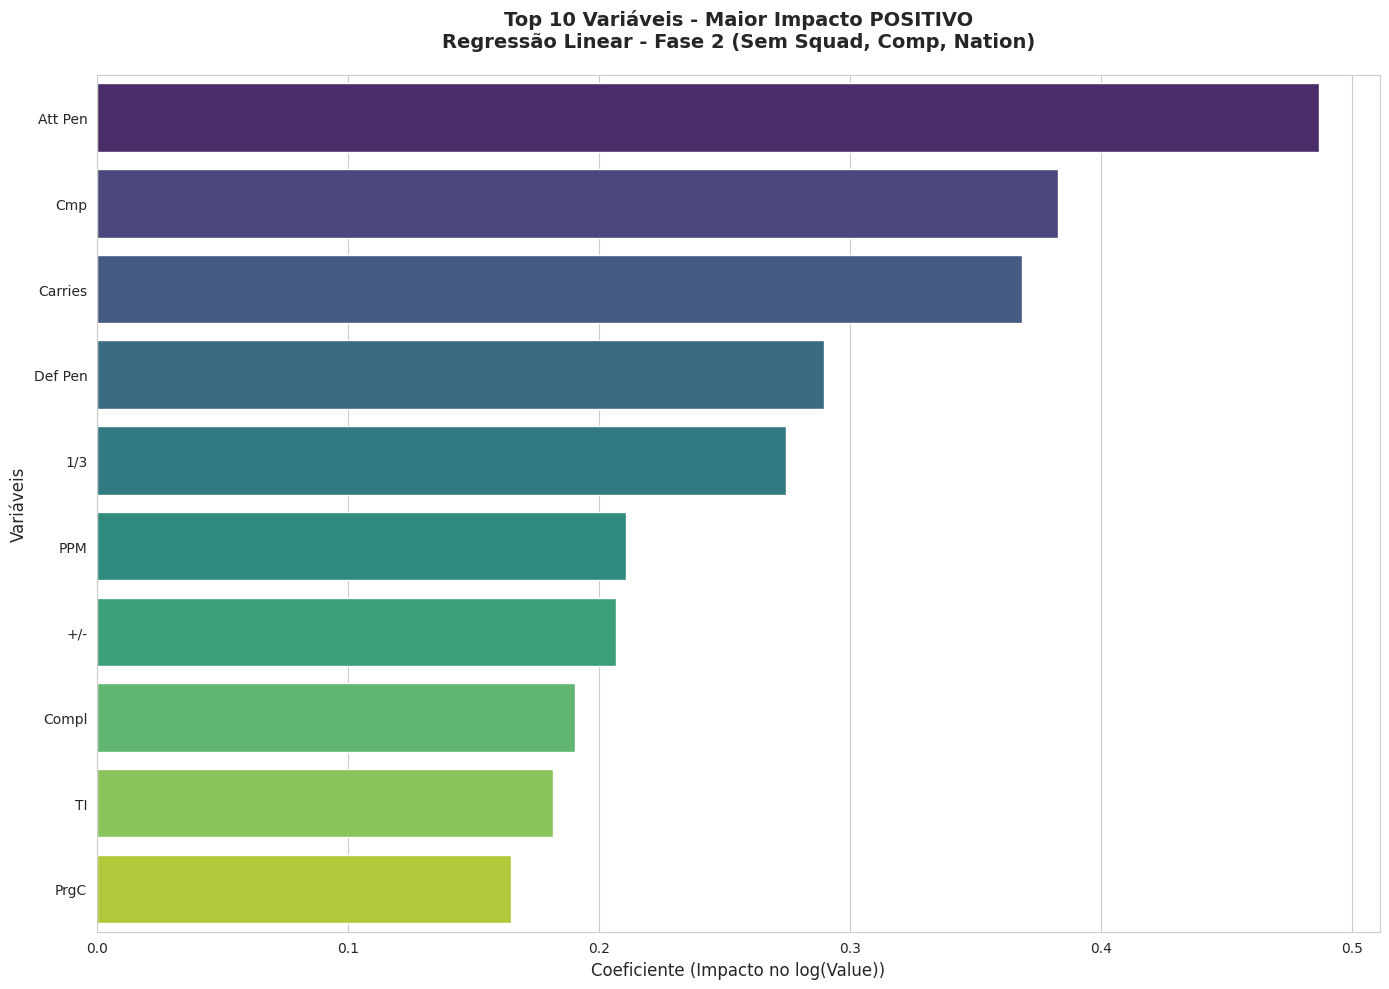

In [55]:
# 1. EXTRAIR COEFICIENTES DA REGRESSÃO LINEAR - FASE 2
lr_model_f2 = pipe_lr_f2.named_steps['model']
preprocessor_f2_fitted = pipe_lr_f2.named_steps['preprocessor']

# Obter nomes das features após pré-processamento Fase 2
feature_names_f2 = []

# Features numéricas
feature_names_f2.extend(COLUNAS_RFE_NUMERICAS_FASE2)

# Features categóricas (apenas Pos agora)
if hasattr(preprocessor_f2_fitted.named_transformers_['cat'], 'get_feature_names_out'):
    cat_features_f2 = preprocessor_f2_fitted.named_transformers_['cat'].get_feature_names_out(COLUNAS_CATEGORICAS_FASE2)
    feature_names_f2.extend(cat_features_f2)
else:
    # Fallback manual
    for col in COLUNAS_CATEGORICAS_FASE2:
        unique_vals = X_train_f2[col].unique()
        for val in unique_vals:
            feature_names_f2.append(f"{col}_{val}")

# Obter coeficientes
coeficientes_f2 = lr_model_f2.coef_

# Garantir compatibilidade de tamanho
if len(coeficientes_f2) > len(feature_names_f2):
    coeficientes_f2 = coeficientes_f2[:len(feature_names_f2)]
elif len(coeficientes_f2) < len(feature_names_f2):
    feature_names_f2 = feature_names_f2[:len(coeficientes_f2)]

# 2. CRIAR DATAFRAME COM COEFICIENTES
df_coeficientes_f2 = pd.DataFrame({
    'feature': feature_names_f2,
    'coeficiente': coeficientes_f2,
    'coeficiente_abs': np.abs(coeficientes_f2),  # Para ordenar por magnitude
}).sort_values('coeficiente_abs', ascending=False)

# 3. GRÁFICOS DE FEATURE IMPORTANCE - REGRESSÃO LINEAR

# 3.1 Top 15 Coeficientes Positivos (maior impacto positivo)
coef_positivos_f2 = df_coeficientes_f2[df_coeficientes_f2['coeficiente'] > 0].sort_values('coeficiente', ascending=False)
top_10_positivo_lr_f2 = coef_positivos_f2.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_positivo_lr_f2, y='feature', x='coeficiente', palette='viridis')
plt.title('Top 10 Variáveis - Maior Impacto POSITIVO\nRegressão Linear - Fase 2 (Sem Squad, Comp, Nation)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)


plt.tight_layout()
plt.show()




/tmp/ipython-input-4264997779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_negativo_lr_f2, y='feature', x='coeficiente', palette='Reds_r')


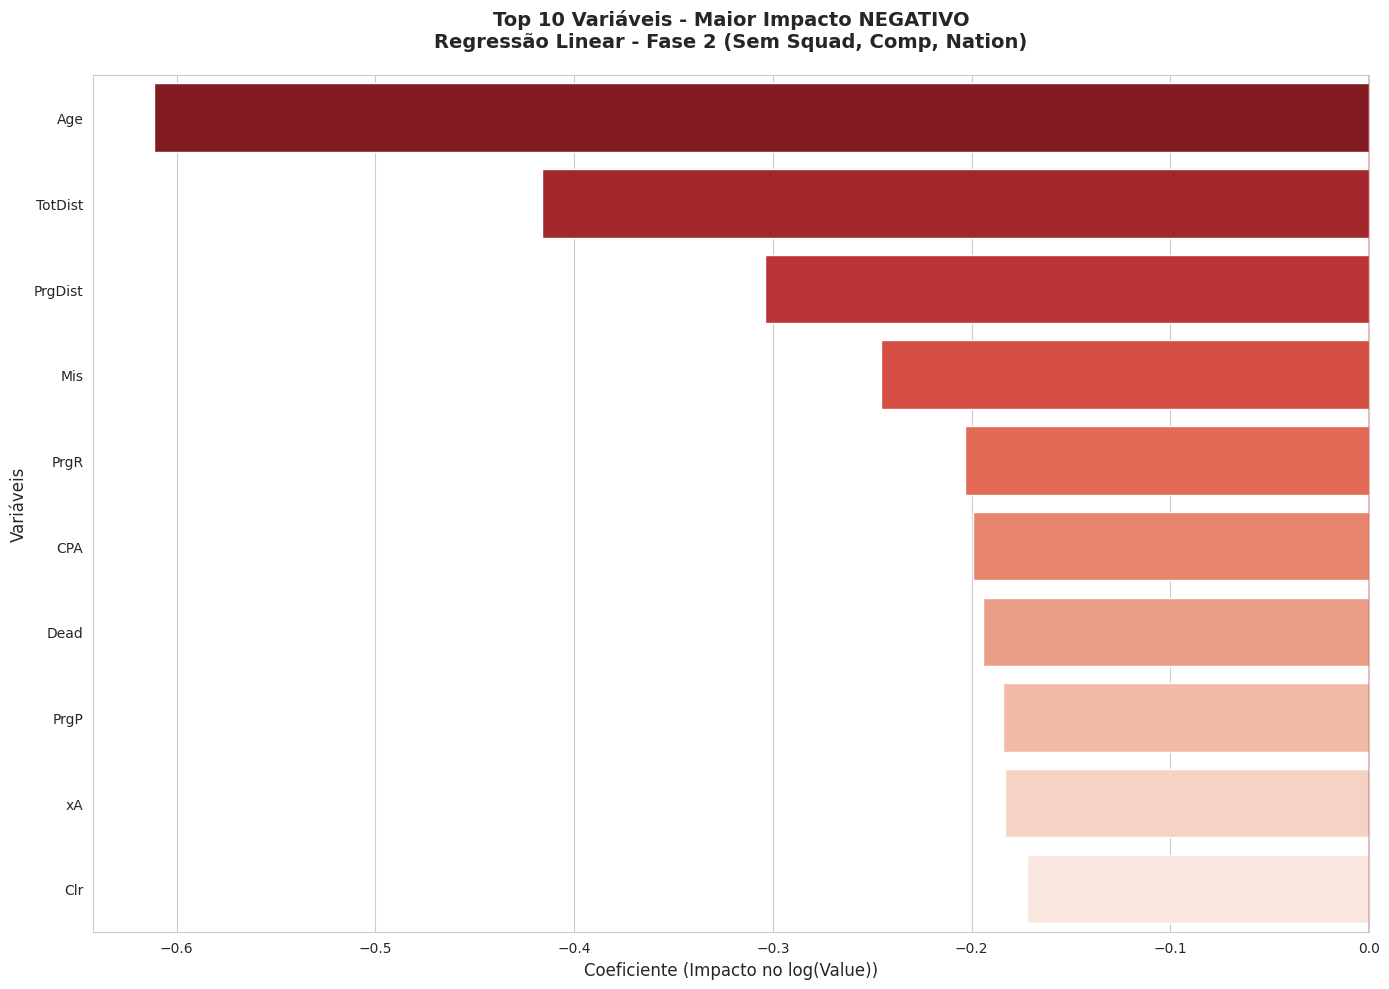

In [56]:
# 3.2 Top 10 Coeficientes Negativos (maior impacto negativo)
coef_negativos_f2 = df_coeficientes_f2[df_coeficientes_f2['coeficiente'] < 0].sort_values('coeficiente', ascending=True)
top_10_negativo_lr_f2 = coef_negativos_f2.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_negativo_lr_f2, y='feature', x='coeficiente', palette='Reds_r')
plt.title('Top 10 Variáveis - Maior Impacto NEGATIVO\nRegressão Linear - Fase 2 (Sem Squad, Comp, Nation)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

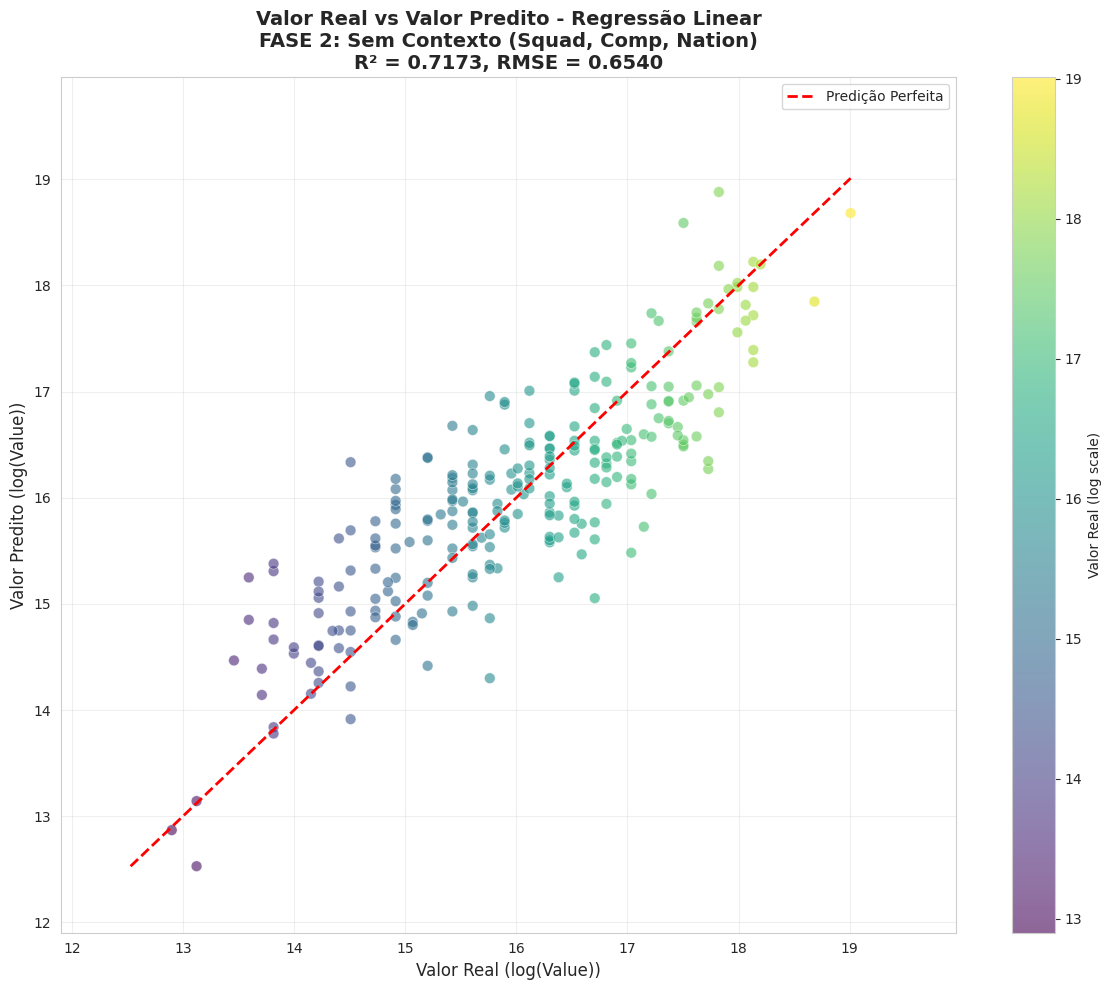

In [57]:

# Calcular métricas para Fase 2
r2_lr_f2 = resultados_fase2[resultados_fase2['Modelo'] == 'Regressão Linear']['R²'].values[0]
rmse_lr_f2 = resultados_fase2[resultados_fase2['Modelo'] == 'Regressão Linear']['RMSE'].values[0]

# Criar scatter plot em escala log - FASE 2
plt.figure(figsize=(12, 10))

# Plot principal
scatter = plt.scatter(y_test_f2, y_pred_lr_f2,
                     alpha=0.6, s=60, c=y_test_f2, cmap='viridis',
                     edgecolors='white', linewidth=0.5)

# Linha de perfeita predição
min_val = min(y_test_f2.min(), y_pred_lr_f2.min())
max_val = max(y_test_f2.max(), y_pred_lr_f2.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')

plt.colorbar(scatter, label='Valor Real (log scale)')
plt.xlabel('Valor Real (log(Value))', fontsize=12)
plt.ylabel('Valor Predito (log(Value))', fontsize=12)
plt.title(f'Valor Real vs Valor Predito - Regressão Linear\nFASE 2: Sem Contexto (Squad, Comp, Nation)\nR² = {r2_lr_f2:.4f}, RMSE = {rmse_lr_f2:.4f}',
          fontsize=14, fontweight='bold')

# Adicionar grid
plt.grid(True, alpha=0.3)
plt.legend()

# Ajustar limites dos eixos
plt.xlim(min_val * 0.95, max_val * 1.05)
plt.ylim(min_val * 0.95, max_val * 1.05)

plt.tight_layout()
plt.show()

#**Fase 3 - Somente Variáveis de Desempenho**

In [58]:
# 1. DEFINIR NOVAS COLUNAS (removendo Age além das anteriores)
COLUNAS_CATEGORICAS_FASE3 = ['Pos']  # Apenas posição mantida

# Remover 'Age' das variáveis numéricas
COLUNAS_RFE_NUMERICAS_FASE3 = [col for col in COLUNAS_RFE_NUMERICAS if col != 'Age']

print(f"Variáveis categóricas Fase 3: {COLUNAS_CATEGORICAS_FASE3}")
print(f"Variáveis numéricas Fase 3: {len(COLUNAS_RFE_NUMERICAS_FASE3)} colunas")
print(f"Variáveis removidas: Age, Squad, Comp, Nation")

# 2. PREPARAR OS DADOS PARA FASE 3
COLUNAS_FINAIS_ML_FASE3 = COLUNAS_RFE_NUMERICAS_FASE3 + COLUNAS_CATEGORICAS_FASE3
X_fase3 = df_jogadores_linha[COLUNAS_FINAIS_ML_FASE3].copy()
y_fase3 = df_jogadores_linha['log_Value']  # Manter o mesmo target

print(f"Shape X_fase3: {X_fase3.shape}")
print(f"Total de variáveis na Fase 3: {len(COLUNAS_FINAIS_ML_FASE3)}")

# 3. DIVISÃO DOS DADOS (mesma semente para comparabilidade)
X_train_f3, X_test_f3, y_train_f3, y_test_f3 = train_test_split(
    X_fase3, y_fase3, test_size=0.2, random_state=42, stratify=df_jogadores_linha['Pos']
)

print(f"\nDivisão dos dados - Fase 3:")
print(f"Treino: {X_train_f3.shape[0]} amostras")
print(f"Teste: {X_test_f3.shape[0]} amostras")

Variáveis categóricas Fase 3: ['Pos']
Variáveis numéricas Fase 3: 34 colunas
Variáveis removidas: Age, Squad, Comp, Nation
Shape X_fase3: (1262, 35)
Total de variáveis na Fase 3: 35

Divisão dos dados - Fase 3:
Treino: 1009 amostras
Teste: 253 amostras


In [59]:
# 4. PIPELINE DE PRÉ-PROCESSAMENTO FASE 3
transformador_numerico_f3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

transformador_categorico_f3 = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_f3 = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico_f3, COLUNAS_RFE_NUMERICAS_FASE3),
        ('cat', transformador_categorico_f3, COLUNAS_CATEGORICAS_FASE3)
    ],
    remainder='drop'
)

In [60]:
# 5. TREINAR MODELOS - FASE 3

# 5.1 Regressão Linear - Fase 3
print("\n" + "="*50)
print("TREINANDO REGRESSÃO LINEAR - FASE 3")
print("="*50)

pipe_lr_f3 = Pipeline(steps=[
    ('preprocessor', preprocessor_f3),
    ('model', LinearRegression())
])

pipe_lr_f3.fit(X_train_f3, y_train_f3)
y_pred_lr_f3 = pipe_lr_f3.predict(X_test_f3)

# 5.2 Random Forest - Fase 3
print("\n" + "="*50)
print("TREINANDO RANDOM FOREST - FASE 3")
print("="*50)

pipe_rf_f3 = Pipeline(steps=[
    ('preprocessor', preprocessor_f3),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])

pipe_rf_f3.fit(X_train_f3, y_train_f3)
y_pred_rf_f3 = pipe_rf_f3.predict(X_test_f3)

# 5.3 XGBoost - Fase 3
print("\n" + "="*50)
print("TREINANDO XGBOOST - FASE 3")
print("="*50)

pipe_xgb_f3 = Pipeline(steps=[
    ('preprocessor', preprocessor_f3),
    ('model', XGBRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    ))
])

pipe_xgb_f3.fit(X_train_f3, y_train_f3)
y_pred_xgb_f3 = pipe_xgb_f3.predict(X_test_f3)



TREINANDO REGRESSÃO LINEAR - FASE 3

TREINANDO RANDOM FOREST - FASE 3

TREINANDO XGBOOST - FASE 3


In [61]:
# 6. AVALIAÇÃO DOS MODELOS - FASE 3
print("\n" + "="*70)
print("AVALIAÇÃO DOS MODELOS - FASE 3")
print("="*70)

resultados_fase3 = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest', 'XGBoost'],
    'RMSE': [
        avaliar_modelo(y_test_f3, y_pred_lr_f3)[0],
        avaliar_modelo(y_test_f3, y_pred_rf_f3)[0],
        avaliar_modelo(y_test_f3, y_pred_xgb_f3)[0]
    ],
    'MAE': [
        avaliar_modelo(y_test_f3, y_pred_lr_f3)[1],
        avaliar_modelo(y_test_f3, y_pred_rf_f3)[1],
        avaliar_modelo(y_test_f3, y_pred_xgb_f3)[1]
    ],
    'R²': [
        avaliar_modelo(y_test_f3, y_pred_lr_f3)[2],
        avaliar_modelo(y_test_f3, y_pred_rf_f3)[2],
        avaliar_modelo(y_test_f3, y_pred_xgb_f3)[2]
    ]
})

print("Métricas de desempenho - FASE 3:\n")
print(resultados_fase3.round(4))


AVALIAÇÃO DOS MODELOS - FASE 3
Métricas de desempenho - FASE 3:

             Modelo    RMSE     MAE      R²
0  Regressão Linear  0.8190  0.6717  0.5567
1     Random Forest  0.8877  0.7273  0.4792
2           XGBoost  0.9169  0.7408  0.4444


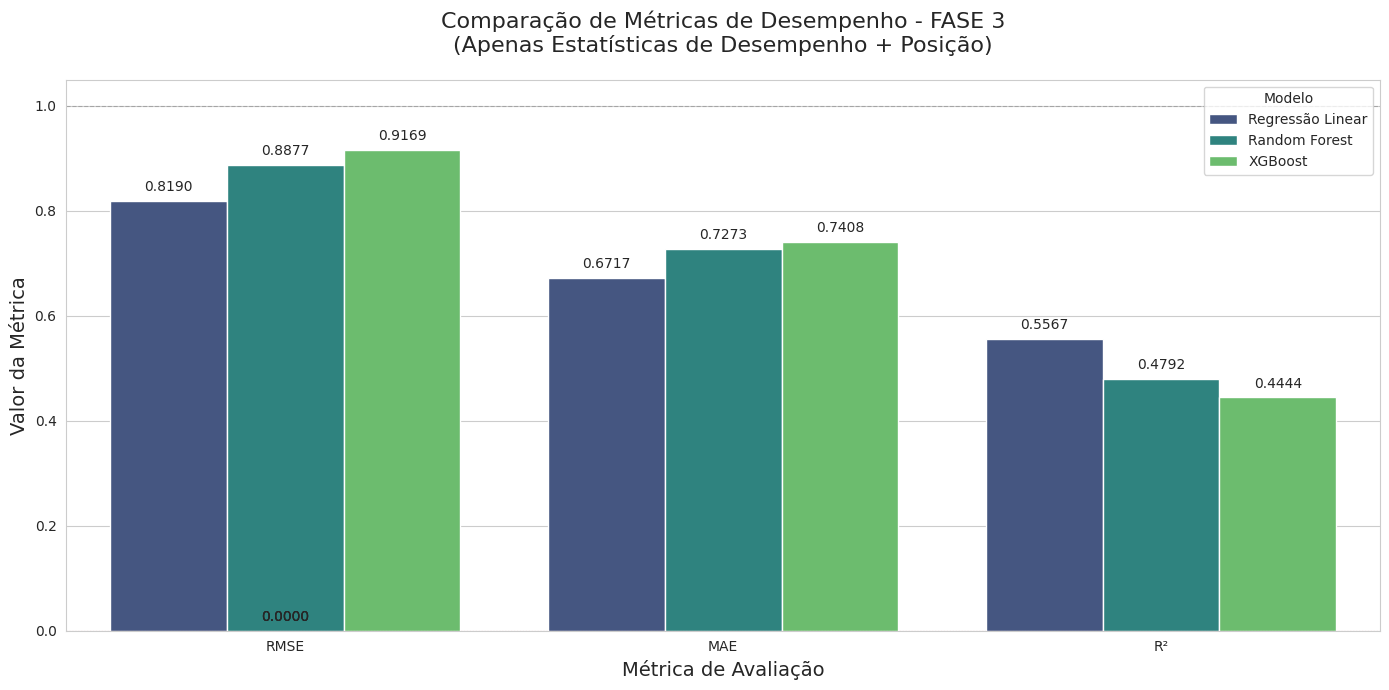

In [62]:
# Preparar dados para o gráfico
df_metrics_fase3 = resultados_fase3[['Modelo', 'RMSE', 'MAE', 'R²']].copy()
df_long_fase3 = df_metrics_fase3.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Criar visualização
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_long_fase3,
    x='Métrica',
    y='Valor',
    hue='Modelo',
    palette='viridis'
)

plt.title('Comparação de Métricas de Desempenho - FASE 3\n(Apenas Estatísticas de Desempenho + Posição)', fontsize=16, pad=20)
plt.xlabel('Métrica de Avaliação', fontsize=14)
plt.ylabel('Valor da Métrica', fontsize=14)
plt.legend(title='Modelo', loc='upper right')

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# Linhas de referência
ax.axhline(1.0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
ax.axhline(0.0, color='red', linestyle=':', linewidth=0.8, alpha=0.5)

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1559181926.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_positivo_lr_f3, y='feature', x='coeficiente', palette='viridis')


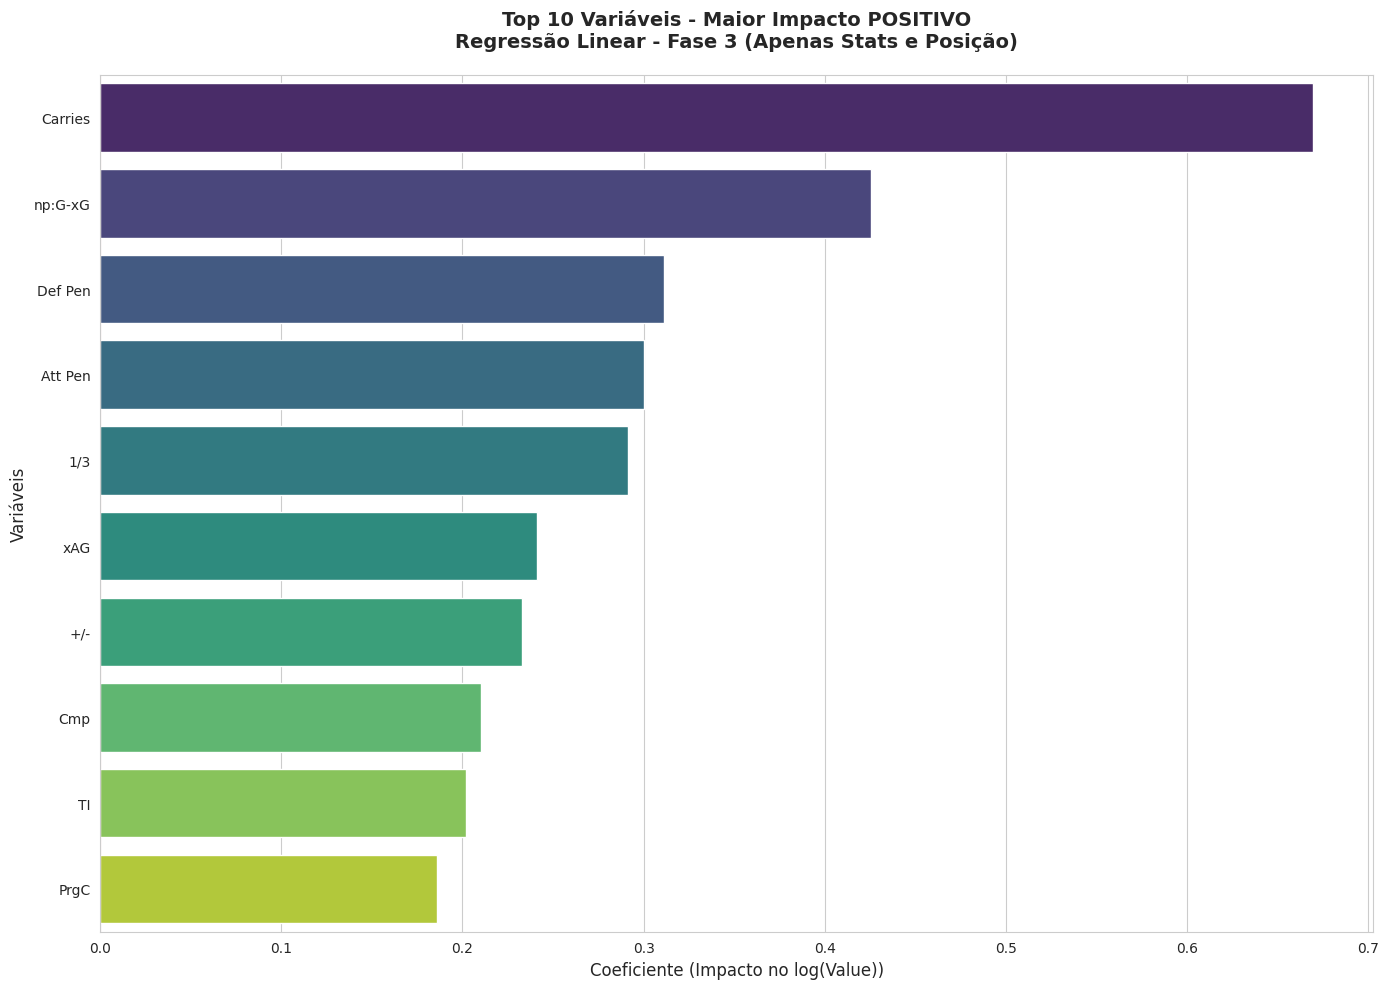

In [63]:
# 1. EXTRAIR COEFICIENTES DA REGRESSÃO LINEAR - FASE 2
lr_model_f3 = pipe_lr_f3.named_steps['model']
preprocessor_f3_fitted = pipe_lr_f3.named_steps['preprocessor']

# Obter nomes das features após pré-processamento Fase 2
feature_names_f3 = []

# Features numéricas
feature_names_f3.extend(COLUNAS_RFE_NUMERICAS_FASE3)

# Features categóricas (apenas Pos agora)
if hasattr(preprocessor_f3_fitted.named_transformers_['cat'], 'get_feature_names_out'):
    cat_features_f3 = preprocessor_f3_fitted.named_transformers_['cat'].get_feature_names_out(COLUNAS_CATEGORICAS_FASE3)
    feature_names_f3.extend(cat_features_f3)
else:
    # Fallback manual
    for col in COLUNAS_CATEGORICAS_FASE3:
        unique_vals = X_train_f3[col].unique()
        for val in unique_vals:
            feature_names_f3.append(f"{col}_{val}")

# Obter coeficientes
coeficientes_f3 = lr_model_f3.coef_

# Garantir compatibilidade de tamanho
if len(coeficientes_f3) > len(feature_names_f3):
    coeficientes_f3 = coeficientes_f3[:len(feature_names_f3)]
elif len(coeficientes_f3) < len(feature_names_f3):
    feature_names_f3 = feature_names_f3[:len(coeficientes_f3)]

# 2. CRIAR DATAFRAME COM COEFICIENTES
df_coeficientes_f3 = pd.DataFrame({
    'feature': feature_names_f3,
    'coeficiente': coeficientes_f3,
    'coeficiente_abs': np.abs(coeficientes_f3),  # Para ordenar por magnitude
}).sort_values('coeficiente_abs', ascending=False)

# 3. GRÁFICOS DE FEATURE IMPORTANCE - REGRESSÃO LINEAR

# 3.1 Top 10 Coeficientes Positivos (maior impacto positivo)
coef_positivos_f3 = df_coeficientes_f3[df_coeficientes_f3['coeficiente'] > 0].sort_values('coeficiente', ascending=False)
top_10_positivo_lr_f3 = coef_positivos_f3.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_positivo_lr_f3, y='feature', x='coeficiente', palette='viridis')
plt.title('Top 10 Variáveis - Maior Impacto POSITIVO\nRegressão Linear - Fase 3 (Apenas Stats e Posição)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)


plt.tight_layout()
plt.show()


/tmp/ipython-input-2533768286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_negativo_lr_f3, y='feature', x='coeficiente', palette='Reds_r')


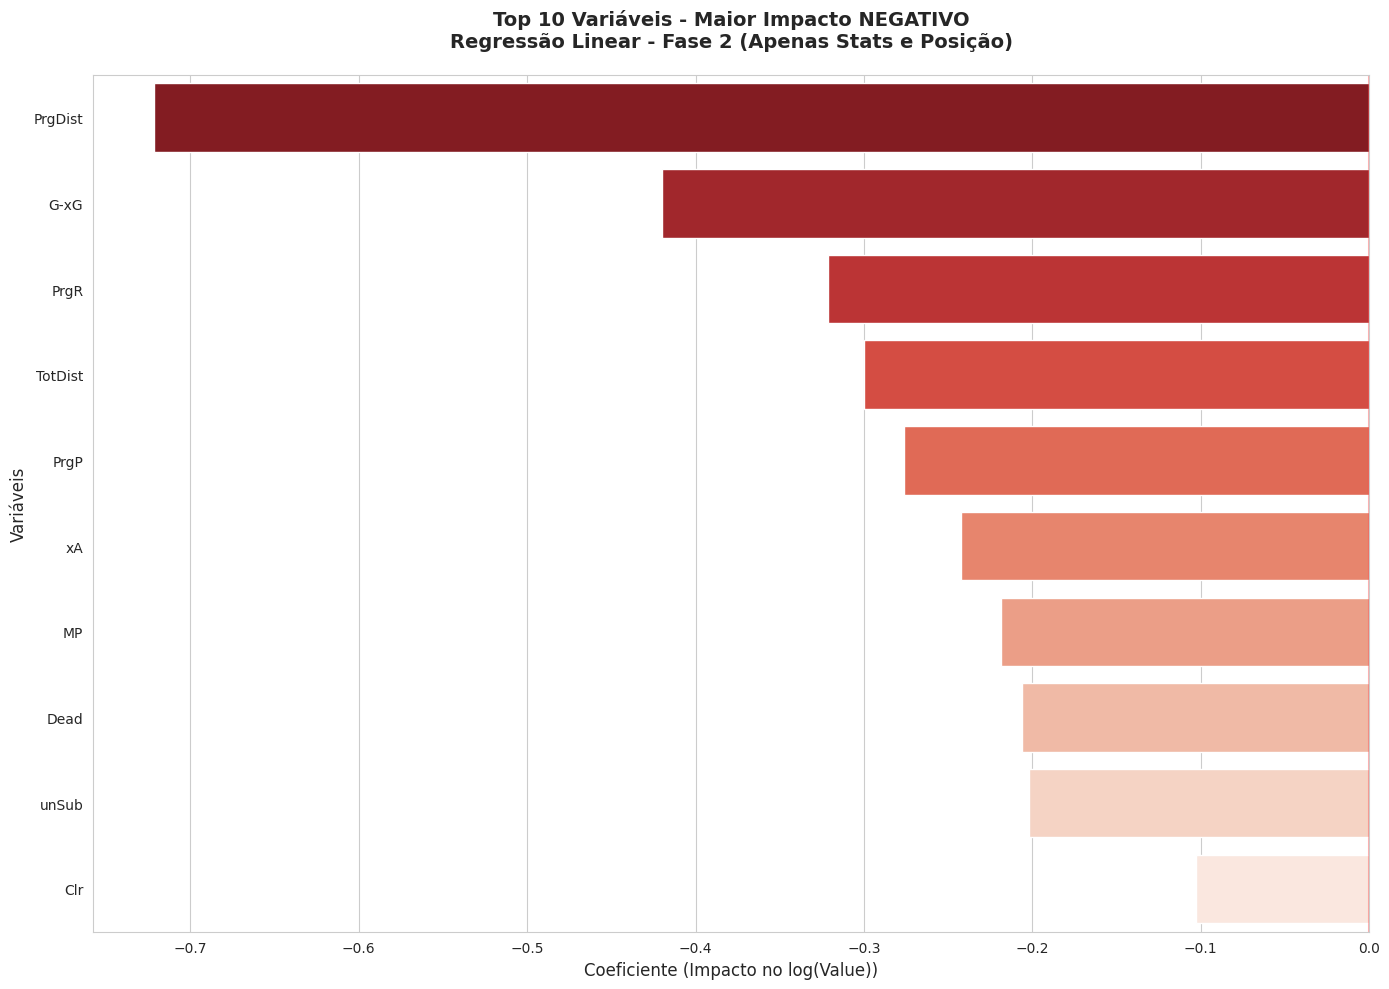

In [64]:
# 3.2 Top 10 Coeficientes Negativos (maior impacto negativo)
coef_negativos_f3 = df_coeficientes_f3[df_coeficientes_f3['coeficiente'] < 0].sort_values('coeficiente', ascending=True)
top_10_negativo_lr_f3 = coef_negativos_f3.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_negativo_lr_f3, y='feature', x='coeficiente', palette='Reds_r')
plt.title('Top 10 Variáveis - Maior Impacto NEGATIVO\nRegressão Linear - Fase 2 (Apenas Stats e Posição)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Coeficiente (Impacto no log(Value))', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

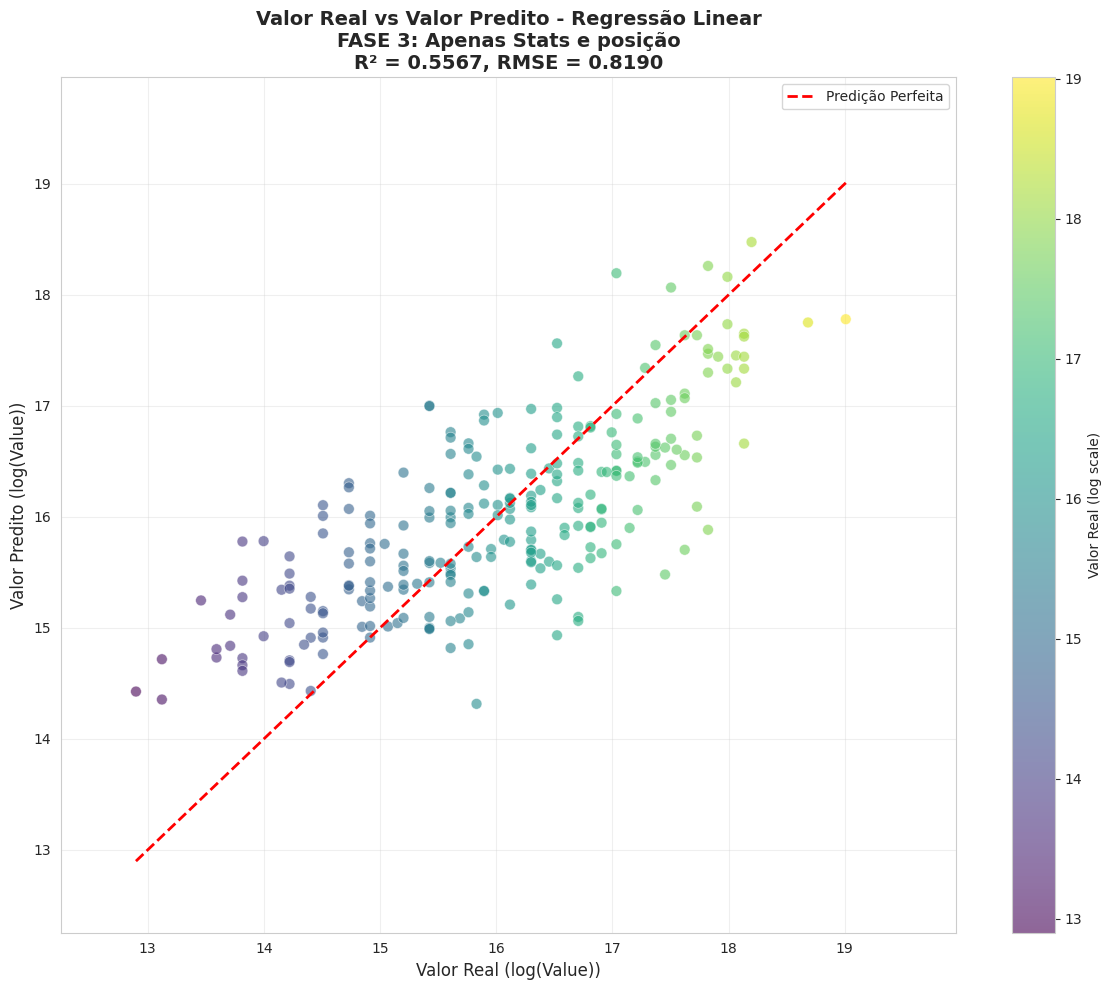

In [65]:

# Calcular métricas para Fase 3
r2_lr_f3 = resultados_fase3[resultados_fase3['Modelo'] == 'Regressão Linear']['R²'].values[0]
rmse_lr_f3 = resultados_fase3[resultados_fase3['Modelo'] == 'Regressão Linear']['RMSE'].values[0]

# Criar scatter plot em escala log - FASE 3
plt.figure(figsize=(12, 10))

# Plot principal
scatter = plt.scatter(y_test_f3, y_pred_lr_f3,
                     alpha=0.6, s=60, c=y_test_f3, cmap='viridis',
                     edgecolors='white', linewidth=0.5)

# Linha de perfeita predição
min_val = min(y_test_f3.min(), y_pred_lr_f3.min())
max_val = max(y_test_f3.max(), y_pred_lr_f3.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predição Perfeita')

plt.colorbar(scatter, label='Valor Real (log scale)')
plt.xlabel('Valor Real (log(Value))', fontsize=12)
plt.ylabel('Valor Predito (log(Value))', fontsize=12)
plt.title(f'Valor Real vs Valor Predito - Regressão Linear\nFASE 3: Apenas Stats e posição\nR² = {r2_lr_f3:.4f}, RMSE = {rmse_lr_f3:.4f}',
          fontsize=14, fontweight='bold')

# Adicionar grid
plt.grid(True, alpha=0.3)
plt.legend()

# Ajustar limites dos eixos
plt.xlim(min_val * 0.95, max_val * 1.05)
plt.ylim(min_val * 0.95, max_val * 1.05)

plt.tight_layout()
plt.show()

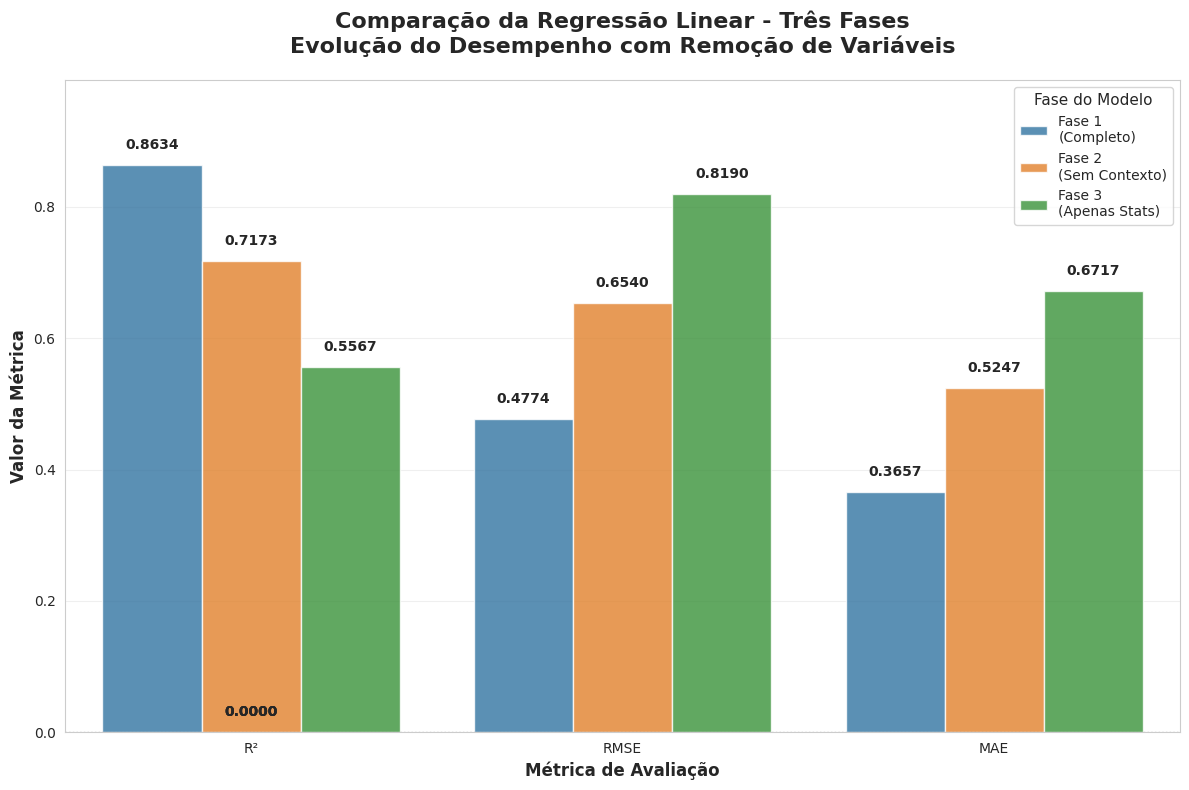

COMPARAÇÃO NUMÉRICA - REGRESSÃO LINEAR

                  Fase     R²   RMSE    MAE
    Fase 1\n(Completo) 0.8634 0.4774 0.3657
Fase 2\n(Sem Contexto) 0.7173 0.6540 0.5247
Fase 3\n(Apenas Stats) 0.5567 0.8190 0.6717

VARIAÇÕES PERCENTUAIS


In [66]:

# 1. Filtrar apenas Regressão Linear das três fases
lr_fase1 = resultados[resultados['Modelo'] == 'Regressão Linear'].copy()
lr_fase2 = resultados_fase2[resultados_fase2['Modelo'] == 'Regressão Linear'].copy()
lr_fase3 = resultados_fase3[resultados_fase3['Modelo'] == 'Regressão Linear'].copy()

# Adicionar identificador de fase
lr_fase1['Fase'] = 'Fase 1\n(Completo)'
lr_fase2['Fase'] = 'Fase 2\n(Sem Contexto)'
lr_fase3['Fase'] = 'Fase 3\n(Apenas Stats)'

# Combinar os resultados
lr_comparacao = pd.concat([lr_fase1, lr_fase2, lr_fase3], ignore_index=True)

# 2. Preparar dados no formato longo
lr_long = lr_comparacao.melt(
    id_vars=['Fase', 'Modelo'],
    value_vars=['R²', 'RMSE', 'MAE'],
    var_name='Métrica',
    value_name='Valor'
)

# 3. Criar o gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Paleta de cores para as fases
cores_fases = ['#1f77b4', '#ff7f0e', '#2ca02c']

ax = sns.barplot(
    data=lr_long,
    x='Métrica',
    y='Valor',
    hue='Fase',
    palette=cores_fases,
    alpha=0.8
)

# Personalização do gráfico
plt.title('Comparação da Regressão Linear - Três Fases\nEvolução do Desempenho com Remoção de Variáveis',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Métrica de Avaliação', fontsize=12, fontweight='bold')
plt.ylabel('Valor da Métrica', fontsize=12, fontweight='bold')
plt.legend(title='Fase do Modelo', title_fontsize=11, fontsize=10, loc='upper right')

# Adicionar valores nas barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    # Posicionar texto de forma inteligente baseado na métrica
    if lr_long['Métrica'].iloc[i % 3] == 'R²':  # R² - texto acima
        va_pos = 'bottom'
        offset = 0.02
    else:  # RMSE e MAE - texto abaixo do topo
        va_pos = 'bottom'
        offset = 0.02

    ax.annotate(
        f'{altura:.4f}',
        (p.get_x() + p.get_width() / 2., altura + offset),
        ha='center',
        va=va_pos,
        fontsize=10,
        fontweight='bold'
    )

# Linhas de referência
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, linewidth=1)  # R² ideal
ax.axhline(y=0.0, color='gray', linestyle=':', alpha=0.5, linewidth=1)  # Base

# Ajustar limites do eixo Y
ax.set_ylim(0, max(lr_long['Valor']) * 1.15)

# Grade para melhor leitura
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 4. Exibir tabela com os valores numéricos


tabela_comparacao = lr_comparacao[['Fase', 'R²', 'RMSE', 'MAE']].round(4)
print(f"\n{tabela_comparacao.to_string(index=False)}")

